**Case Study: Mind Map**

Module overview:
* Visualisation examples
* Using visualisation to derive and communicate insights
* Case study: Analysing the Google Play Store Ratings Dataset
* Data manipulation & wrangling
* Visualisations using Python libraries - matplotlib & seaborn
* Use Plotly library to make beautiful interactive charts

Scenario:

The team at Google Play Store wants to develop a feature that would enable them to boost visibility for the most promising apps. Now, this analysis would require a preliminary understanding of the features that define a well-performing app. For which, you can ask questions like:

* Does a higher size or price of an app necessarily mean that it would perform better than the other apps?
* Or does a higher number of installs give a clear picture of which app would have a better rating than others?

Question: Target Variable

In the world of machine learning, the target variable is defined as the variable or column in a dataset whose value is to be predicted or analysed by using the other variables in the same dataset. For our case study, can you guess which of the following is the target variable?

Solution: Rating

You want to analyse the data set to find out the features that determine whether an app is performing well or not in ratings. Therefore, the Rating column is our target variable. You’ll be analysing the way the rating varies across different categories of other variables to determine the most important indicators for the high-performing apps.

**Data Handling and Cleaning: I**

# Google Playstore Case Study

In this module you’ll be learning data visualisation with the help of a case study. This will enable you to understand how visualisation aids you in solving business problems.

**Problem Statement**

The team at Google Play Store wants to develop a feature that would enable them to boost visibility for the most promising apps. Now, this analysis would require a preliminary understanding of the features that define a well-performing app. You can ask questions like:
- Does a higher size or price necessarily mean that an app would perform better than the other apps?
- Or does a higher number of installs give a clear picture of which app would have a better rating than others?




### Session 1 - Introduction to Data Visualisation

In [ ]:
#import the libraries
import pandas as pd, numpy as np

In [ ]:
#read the dataset and check the first five rows
inp0 = pd.read_csv('googleplaystore_v2.csv')
inp0.head()

App        Category  Rating  \
0     Photo Editor & Candy Camera & Grid & ScrapBook  ART_AND_DESIGN     4.1   
1                                Coloring book moana  ART_AND_DESIGN     3.9   
2  U Launcher Lite – FREE Live Cool Themes, Hide ...  ART_AND_DESIGN     4.7   
3                              Sketch - Draw & Paint  ART_AND_DESIGN     4.5   
4              Pixel Draw - Number Art Coloring Book  ART_AND_DESIGN     4.3   

  Reviews     Size     Installs  Type Price Content Rating  \
0     159  19000.0      10,000+  Free     0       Everyone   
1     967  14000.0     500,000+  Free     0       Everyone   
2   87510   8700.0   5,000,000+  Free     0       Everyone   
3  215644  25000.0  50,000,000+  Free     0           Teen   
4     967   2800.0     100,000+  Free     0       Everyone   

                      Genres      Last Updated         Current Ver  \
0               Art & Design   January 7, 2018               1.0.0   
1  Art & Design;Pretend Play  January 15, 2018               2.0.0   
2               Art & Design    August 1, 2018               1.2.4   
3               Art & Design      June 8, 2018  Varies with device   
4    Art & Design;Creativity     June 20, 2018                 1.1   

    Android Ver  
0  4.0.3 and up  
1  4.0.3 and up  
2  4.0.3 and up  
3    4.2 and up  
4    4.4 and up

In [ ]:
#Check the shape of the dataframe
inp0.shape # 10.8k rows, 13 cols, i.e. 10.8k apps and 13 features or cols

(10841, 13)

In [ ]:
#Check the datatypes of all the columns of the dataframe
inp0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  float64
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(2), object(11)
memory usage: 1.1+ MB


As we can see from inp0.info(), some of the cols like rating have missing values, and some have incorrect data types assicated with them. Let’s discuss both of them briefly here:

* Missing values: You would almost always encounter data which have rows where no
observation is recorded for a certain variable. These can affect the analysis process and the generated insights significantly. Some common techniques to treat this issue are
     * Imputation, where you replace the missing value with another estimated value
     * Dropping the rows containing the missing values altogether
     * or depending on the case, you can also go ahead and keep the missing values as long as they don’t affect the analysis.


* Incorrect data types: This discrepancy mostly occurs due to some incorrect entry in the column which is stored in a format other than the desired one due to which the entire column gets misclassified. Or in some other cases, the format of the entire column is different from what we need for our analysis purposes. You either have to fix certain values or clean the entire column only to bring it to the correct format.

Missing values will affect our statistics drastically, for starters our inbuild functions of mean, sum, var etc will give incorrect results which clearly is quite dangerous. Also, you need the values to be in the numeric format of int or float to perform these operations. Before you proceed to the data analysis and visualisation part, it is essential for you to remove the above discrepancies.

### Data Handling and Cleaning

The first few steps involve making sure that there are no __missing values__ or __incorrect data types__ before we proceed to the analysis stage. These aforementioned problems are handled as follows:

 - For Missing Values: Some common techniques to treat this issue are
    - Dropping the rows containing the missing values
    - Imputing the missing values
    - Keep the missing values if they don't affect the analysis

    
 - Incorrect Data Types:
    - Clean certain values
    - Clean and convert an entire column


In [ ]:
#Check the datatypes of all the columns of the dataframe
inp0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  float64
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(2), object(11)
memory usage: 1.1+ MB


#### Missing Value Treatment

In [ ]:
#Check the number of null values in the columns
inp0.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

Handling missing values for rating
 - Ratings is the target variable
 - drop the records where ratings is missing, since rating is the target value, you do not want to do any guesswork for ratings.

In [ ]:
#Drop the rows having null values in the Rating field
inp1 = inp0.dropna(subset=['Rating']) # this is the same as inp1 = inp0[∼inp0.Rating.isnull()]
#dropna drops rows where the 'Rating' column has null values

#Check the shape of the dataframe
inp1.shape

(9367, 13)

In [ ]:
# Check the number of nulls in the Rating field again to cross-verify
inp1.Rating.isnull().sum()

0

In [ ]:
#Question
#Check the number of nulls in the dataframe again and find the total number of null values
inp1.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    1
Genres            0
Last Updated      0
Current Ver       4
Android Ver       3
dtype: int64

In [ ]:
#Inspect the nulls in the Android Version column
inp1[inp1['Android Ver'].isnull()]

App         Category  Rating  \
4453                    [substratum] Vacuum: P  PERSONALIZATION     4.4   
4490                      Pi Dark [substratum]  PERSONALIZATION     4.5   
10472  Life Made WI-Fi Touchscreen Photo Frame              1.9    19.0   

      Reviews          Size Installs  Type     Price Content Rating  \
4453      230  11000.000000   1,000+  Paid     $1.49       Everyone   
4490      189   2100.000000  10,000+  Free         0       Everyone   
10472    3.0M  21516.529524     Free     0  Everyone            NaN   

                  Genres    Last Updated Current Ver Android Ver  
4453     Personalization   July 20, 2018         4.4         NaN  
4490     Personalization  March 27, 2018         1.1         NaN  
10472  February 11, 2018          1.0.19  4.0 and up         NaN

We can see that in record 10472, the data has shifted. E.g. in installs, it says free instead of a number, price says everyone, so the values are not in the right column. For this reason, we should drop this column.

In [ ]:
#Drop the row having shifted values
inp1.loc[10472, :] # this drops row 10472, including all its cols. This is not good practice (hard coded)


App               Life Made WI-Fi Touchscreen Photo Frame
Category                                              1.9
Rating                                               19.0
Reviews                                              3.0M
Size                                         21516.529524
Installs                                             Free
Type                                                    0
Price                                            Everyone
Content Rating                                        NaN
Genres                                  February 11, 2018
Last Updated                                       1.0.19
Current Ver                                    4.0 and up
Android Ver                                           NaN
Name: 10472, dtype: object

In [ ]:
# identify the row with shifted values, best practice, using identifiers (android ver = 0) and category = 1.9
inp1[(inp1['Android Ver'].isnull() & (inp1.Category == "1.9"))]

App Category  Rating Reviews  \
10472  Life Made WI-Fi Touchscreen Photo Frame      1.9    19.0    3.0M   

               Size Installs Type     Price Content Rating             Genres  \
10472  21516.529524     Free    0  Everyone            NaN  February 11, 2018   

      Last Updated Current Ver Android Ver  
10472       1.0.19  4.0 and up         NaN

In [ ]:
# drop the row with shifted values, best practice
inp1 = inp1[~((inp1['Android Ver'].isnull()) & (inp1.Category == "1.9"))]
# this is the same as
# inp1 = inp1[∼(inp1['Android Ver'].isnull() & (inp1.Category == "1.9"))]

In [ ]:
#Check the nulls againin Android version column to cross-verify
inp1[inp1['Android Ver'].isnull()]

App         Category  Rating Reviews     Size  \
4453  [substratum] Vacuum: P  PERSONALIZATION     4.4     230  11000.0   
4490    Pi Dark [substratum]  PERSONALIZATION     4.5     189   2100.0   

     Installs  Type  Price Content Rating           Genres    Last Updated  \
4453   1,000+  Paid  $1.49       Everyone  Personalization   July 20, 2018   
4490  10,000+  Free      0       Everyone  Personalization  March 27, 2018   

     Current Ver Android Ver  
4453         4.4         NaN  
4490         1.1         NaN

Imputing Missing Values

- For numerical variables use mean and median
- For categorical variables use mode

In [ ]:
#Check the most common value in the Android version column
inp1['Android Ver'].value_counts()

Android Ver
4.1 and up            2059
Varies with device    1319
4.0.3 and up          1240
4.0 and up            1131
4.4 and up             875
2.3 and up             582
5.0 and up             535
4.2 and up             338
2.3.3 and up           240
3.0 and up             211
2.2 and up             208
4.3 and up             207
2.1 and up             113
1.6 and up              87
6.0 and up              48
7.0 and up              41
3.2 and up              31
2.0 and up              27
5.1 and up              18
1.5 and up              16
3.1 and up               8
2.0.1 and up             7
4.4W and up              6
8.0 and up               5
7.1 and up               3
4.0.3 - 7.1.1            2
5.0 - 8.0                2
1.0 and up               2
7.0 - 7.1.1              1
4.1 - 7.1.1              1
5.0 - 6.0                1
Name: count, dtype: int64

In [ ]:
#Fill up the nulls in the Android Version column with the most common value
inp1['Android Ver'].mode() #

0    4.1 and up
Name: Android Ver, dtype: object

In [ ]:
# extract string value from the above
inp1['Android Ver'].mode()[0] #0 extracts the string value

'4.1 and up'

In [ ]:
# fill the NANs with this value
inp1['Android Ver'] = inp1['Android Ver'].fillna(inp1['Android Ver'].mode()[0])

In [ ]:
inp1['Android Ver'].value_counts() # as we can see value at "4.1 and up" has been incremented by 2

Android Ver
4.1 and up            2061
Varies with device    1319
4.0.3 and up          1240
4.0 and up            1131
4.4 and up             875
2.3 and up             582
5.0 and up             535
4.2 and up             338
2.3.3 and up           240
3.0 and up             211
2.2 and up             208
4.3 and up             207
2.1 and up             113
1.6 and up              87
6.0 and up              48
7.0 and up              41
3.2 and up              31
2.0 and up              27
5.1 and up              18
1.5 and up              16
3.1 and up               8
2.0.1 and up             7
4.4W and up              6
8.0 and up               5
7.1 and up               3
4.0.3 - 7.1.1            2
5.0 - 8.0                2
1.0 and up               2
7.0 - 7.1.1              1
4.1 - 7.1.1              1
5.0 - 6.0                1
Name: count, dtype: int64

In [ ]:
#Check the nulls in the Android version column again to cross-verify
inp1['Android Ver'].isnull().sum()

0

In [ ]:
#Check the nulls in the entire dataframe again
inp1.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       4
Android Ver       0
dtype: int64

Missing values in Current Ver

In [ ]:
#Check the most common value in the Current version column
inp1['Current Ver'].value_counts()

Current Ver
Varies with device    1415
1.0                    458
1.1                    195
1.2                    126
1.3                    120
                      ... 
2.9.10                   1
3.18.5                   1
1.3.A.2.9                1
9.9.1.1910               1
0.3.4                    1
Name: count, Length: 2638, dtype: int64

In [ ]:
#Replace the nulls in the Current version column with "Varies with device"

inp1['Current Ver'].mode()[0]

'Varies with device'

In [ ]:
inp1['Current Ver'] = inp1['Current Ver'].fillna(inp1['Current Ver'].mode()[0])

In [ ]:
# Question : Check the most common value in the Current version column again
inp1['Current Ver'].value_counts()
# this worked because value at varies with device has increased by 4

Current Ver
Varies with device    1419
1.0                    458
1.1                    195
1.2                    126
1.3                    120
                      ... 
2.9.10                   1
3.18.5                   1
1.3.A.2.9                1
9.9.1.1910               1
0.3.4                    1
Name: count, Length: 2638, dtype: int64

**Data Handling and Cleaning: II**

In the previous segment, you were briefly introduced to the dataset and also performed some basic data-cleaning tasks by handling the null values. The next step would be to handle the data types of the columns. It is essential that your columns are also in the correct format or else it may hamper any further analysis.

In [ ]:
#Question - Try calculating the average price of all apps having the Android version as "4.1 and up"
inp1[inp1['Android Ver'] == '4.1 and up']['Price'].mean()

TypeError: Could not convert 00000000000000000000000000000000000000000000000000000000000000000000000000000$3.99000000$3.9900000000000000000000000000000000000000$3.9900000000000000000000000000000000000000000000000000000$5.990000000000000000000000$2.9900000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000$9.990000000000000000000000000000000000000000000000000000000000000000000000000000000000000000$2.99$2.990000000000000000000000000000$4.99$2.99$4.99000000000$5.49$10.00$3.99$2.99$2.99$0.99$7.49$2.99$1.99$7.99$19.990000000000000000000000$10.0000$5.49000$39.990$19.99000000000000000000000000000000000000000000000000000000000000000000000000000000000$5.99$5.9900000$5.990000000000000000000000$29.990000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000$2.99000000000$0.99000000000000000000000000000000000000000$0.990000000000$5.9900000000000000$400.00000$2.990000000000$0.99000$2.49$1.99$0.990000$1.49$0.9900$0.990$0.990000$4.7700$4.990000$2.4900000000000000000000000$1.9900000000$1.990$1.990$1.990$0.9900$0.99$3.990000000000000000000000000$1.9900000$9.9900$1.9900$3.990$0.99000$2.9900$19.9900000$0.990000000000000000000$0.99$0.99$0.990000000000000000$399.990$2.49$399.99000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000$8.490000000$1.750000000000000000000000000000000$2.990000$4.9900000000$4.9900000000000000000000000000000000000$0.990$0.99000$2.99000000000$0.990000000$4.4900000000000000000000000000000000000000000000000000000000000000$3.99000000000000000000000$7.990000$4.99000000000000000000000$2.99$0.9900000000000000$0.9900000000000000000000$2.99$3.99000000$4.990000000000$0.99000000000000000000000000000000000000000000000000000000000$0.990000$4.9900$4.9900000000000000$4.990000000000000000000000$2.99000000000000$2.9900000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000$2.99000000000000$3.280000000$2.990000000000000000000000000000$0.99000000000$1.490000000000000000000$0.99000000000000000$12.990000000000000000000000000000000000000000$3.990000000000000$4.4900000$6.9900000000000000000$1.9900000000000000000000000000000000000000000000000$5.9900000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000$8.990000000000000000000000000 to numeric

As we can see, the data type is incorrect, since it contains string values so we cant compute the mean.

#### Handling Incorrect Data Types

Change the variables to the correct types

In [ ]:
#Check the datatypes of all the columns
inp1.dtypes

App                object
Category           object
Rating            float64
Reviews            object
Size              float64
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

In [ ]:
inp1.head()

App        Category  Rating  \
0     Photo Editor & Candy Camera & Grid & ScrapBook  ART_AND_DESIGN     4.1   
1                                Coloring book moana  ART_AND_DESIGN     3.9   
2  U Launcher Lite – FREE Live Cool Themes, Hide ...  ART_AND_DESIGN     4.7   
3                              Sketch - Draw & Paint  ART_AND_DESIGN     4.5   
4              Pixel Draw - Number Art Coloring Book  ART_AND_DESIGN     4.3   

  Reviews     Size     Installs  Type Price Content Rating  \
0     159  19000.0      10,000+  Free     0       Everyone   
1     967  14000.0     500,000+  Free     0       Everyone   
2   87510   8700.0   5,000,000+  Free     0       Everyone   
3  215644  25000.0  50,000,000+  Free     0           Teen   
4     967   2800.0     100,000+  Free     0       Everyone   

                      Genres      Last Updated         Current Ver  \
0               Art & Design   January 7, 2018               1.0.0   
1  Art & Design;Pretend Play  January 15, 2018               2.0.0   
2               Art & Design    August 1, 2018               1.2.4   
3               Art & Design      June 8, 2018  Varies with device   
4    Art & Design;Creativity     June 20, 2018                 1.1   

    Android Ver  
0  4.0.3 and up  
1  4.0.3 and up  
2  4.0.3 and up  
3    4.2 and up  
4    4.4 and up

From the first 5 rows, seems like price is numeric but .dtypes says something else. So lets explore this:

In [ ]:
#Analyse the Price column to check the issue
inp1['Price'].value_counts()

Price
0          8719
$2.99       114
$0.99       107
$4.99        70
$1.99        59
           ... 
$1.29         1
$299.99       1
$379.99       1
$37.99        1
$1.20         1
Name: count, Length: 73, dtype: int64

As we can see, the issue is that there is a dollar sign in front of all values that are not 0. So we need to remove the $ sign and extract the numbers if its not 0.

In [ ]:
#Write the function to make the changes
# Convert the 'Price' column to numeric
inp1.Price = inp1.Price.apply(lambda x: 0 if x == "0" else float(x[1:]))
# if x is 0, return 0, if x != 0, return only the numbers, everything after the $ sign

In [ ]:
#Verify the dtype of Price once again
inp1.Price.dtype

dtype('float64')

In [ ]:
inp1.Price.value_counts() # we successfully removed the $ sign

Price
0.00      8719
2.99       114
0.99       107
4.99        70
1.99        59
          ... 
1.29         1
299.99       1
379.99       1
37.99        1
1.20         1
Name: count, Length: 73, dtype: int64

Handle the reviews column

In [ ]:
#Analyse the Reviews column
inp1['Reviews'].value_counts()

Reviews
2         83
3         78
4         74
5         74
1         67
          ..
49657      1
41420      1
7146       1
44706      1
398307     1
Name: count, Length: 5992, dtype: int64

In [ ]:
# since reviews is float, but nr of reviews can only be an int, we change dtype from float to int

In [ ]:
#Change the dtype of this column
inp1.Reviews = inp1.Reviews.astype("int32") # this will help optimize memory, since reviews wont contain large numbers we can do that

# check if this worked
inp1.Reviews.dtype

dtype('int32')

In [ ]:
#Check the quantitative spread of this dataframe
inp1.Reviews.describe() # this one will change dtype to float because of the float values in mean, std etc

count    9.366000e+03
mean     5.140498e+05
std      3.144042e+06
min      1.000000e+00
25%      1.862500e+02
50%      5.930500e+03
75%      8.153275e+04
max      7.815831e+07
Name: Reviews, dtype: float64

Handle the installs column

In [ ]:
#Analyse the Installs Column
inp1.dtypes

App                object
Category           object
Rating            float64
Reviews             int32
Size              float64
Installs           object
Type               object
Price             float64
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

As we can see, installs is object but should be numeric value like float

In [ ]:
inp1.Installs.head()

0        10,000+
1       500,000+
2     5,000,000+
3    50,000,000+
4       100,000+
Name: Installs, dtype: object

As we can see, there is a comma in between the nums and + in the end. So we need to remove the commas and + signs

**Question** Clean the Installs Column and find the approximate number of apps at the 50th percentile.

In [ ]:
import re
# Remove commas and plus sign from the Installs column
inp1['Installs'] = inp1['Installs'].apply(lambda x: re.sub(r'[,+]', '', x))
# 're.sub' performs a substitution operation on the input string 'x'
# The pattern '[,+]' is a regular expression that matches any comma ',' or plus '+' characters in the string
# The 'repl' parameter is an empty string '' which means that the matched pattern will be replaced with nothing (removed)
# So, 're.sub(r'[,+]', '', x)' removes all commas and plus signs from the input string 'x'
# The 'r' prefix before the pattern string '[,+]' is used to create a raw string literal, which treats backslashes as literal characters
# This lambda function is applied to each element of the 'Installs' column in the DataFrame 'inp1' using the 'apply' method
# The resulting Series after applying the lambda function will have all commas and plus signs removed from the 'Installs' column values

# .sub stands for substitute, so we are substituting ,+ ''

In [ ]:
# Convert the cleaned Installs column to numeric
inp1['Installs'] = pd.to_numeric(inp1['Installs'])

In [ ]:
# Find the approximate number of apps at the 50th percentile
median_installs = inp1['Installs'].quantile(0.5)
print(f"Approximate number of apps at the 50th percentile: {median_installs}")

Approximate number of apps at the 50th percentile: 500000.0



```
re
``` explanation

The re module in Python helps you search for specific patterns in text. Think of it as a way to find and work with parts of text that fit a certain format.

In [ ]:
import re

# Define a string
text = "Hello, world!"

# Search for a pattern in the string
# Here, 'H..' will match any three characters that start with 'H'
match = re.search(r'H..', text)

# Print the found match
print("Found:", match.group()) if match else print("No match found")

Found: Hel


#### **Sanity Checks**

Once you’ve completed the basic data cleaning and data handling tasks, the next step is to ensure that the data that is available with us ‘makes sense’. What it means is that the data needs to be factually correct apart from being of the correct data type.



For example, on a test where you can score between 0 and 100, it is not possible for a student to score 110 marks. Therefore, if such discrepancies occur in a data set, then you need to take care of them accordingly. So, in order to quickly check whether the data in the columns is rational and makes sense, you need to perform the so-called sanity checks.

The data that we have needs to make sense and therefore you can perform certain sanity checks on them to ensure they are factually correct as well. Some sanity checks can be:

- Rating is between 1 and 5 for all the apps.
- Number of Reviews is less than or equal to the number of Installs.
- Free Apps shouldn’t have a price greater than 0.


In [ ]:
# Avg rating should be between 1 & 5
inp1.Rating.describe() # this seems correct, all ratings are between 1 and 5

count    9366.000000
mean        4.191757
std         0.515219
min         1.000000
25%         4.000000
50%         4.300000
75%         4.500000
max         5.000000
Name: Rating, dtype: float64

In [ ]:
#Perform the sanity checks on the Reviews column
# reviews should be <= Installs
inp1[(inp1.Reviews > inp1.Installs)].shape
# as we can see, there are 7 rows that have higher installs than reviews which cant be right

(7, 13)

In [ ]:
inp1[(inp1.Reviews > inp1.Installs)]

App   Category  Rating  Reviews  \
2454             KBA-EZ Health Guide    MEDICAL     5.0        4   
4663   Alarmy (Sleep If U Can) - Pro  LIFESTYLE     4.8    10249   
5917                        Ra Ga Ba       GAME     5.0        2   
6700                Brick Breaker BR       GAME     5.0        7   
7402            Trovami se ci riesci       GAME     5.0       11   
8591                         DN Blog     SOCIAL     5.0       20   
10697                        Mu.F.O.       GAME     5.0        2   

               Size  Installs  Type  Price Content Rating     Genres  \
2454   25000.000000         1  Free   0.00       Everyone    Medical   
4663   21516.529524     10000  Paid   2.49       Everyone  Lifestyle   
5917   20000.000000         1  Paid   1.49       Everyone     Arcade   
6700   19000.000000         5  Free   0.00       Everyone     Arcade   
7402    6100.000000        10  Free   0.00       Everyone     Arcade   
8591    4200.000000        10  Free   0.00           Teen     Social   
10697  16000.000000         1  Paid   0.99       Everyone     Arcade   

           Last Updated         Current Ver         Android Ver  
2454     August 2, 2018              1.0.72        4.0.3 and up  
4663      July 30, 2018  Varies with device  Varies with device  
5917   February 8, 2017               1.0.4          2.3 and up  
6700      July 23, 2018                 1.0          4.1 and up  
7402     March 11, 2017                 0.1          2.3 and up  
8591      July 23, 2018                 1.0          4.0 and up  
10697     March 3, 2017                 1.0          2.3 and up

In [ ]:
# since this seems like incorrect data, lets drop those rows
inp1 = inp1[inp1.Reviews <= inp1.Installs]

For free apps, price should be smaller or equal to 0

In [ ]:
#perform the sanity checks on prices of free apps
inp1[(inp1.Type == "Free") & (inp1.Price > 0)] # seems like this data is correct

Empty DataFrame
Columns: [App, Category, Rating, Reviews, Size, Installs, Type, Price, Content Rating, Genres, Last Updated, Current Ver, Android Ver]
Index: []

As you saw in the video, three essential sanity checks were performed on the data:

* Rating is between 1 and 5 for all the apps.
* Number of Reviews is less than or equal to the number of Installs.
* Free Apps shouldn’t have a price greater than 0.

The first and third conditions were satisfied, whereas the second condition was not satisfied with some records. When you inspected those records, you realised that those apps were likely junk apps and therefore you should ideally remove those records.

**Outliers Analysis with Boxplots**

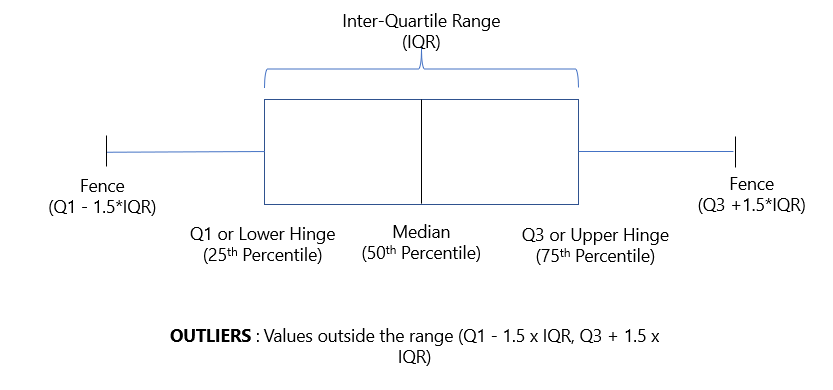

In [ ]:
from IPython.display import Image
Image(filename='Boxplot.png') # outliers would be outside the fence

Now you need to start identifying and removing extreme values or __outliers__ from our dataset. These values can tilt our analysis and often provide us with a biased perspective of the data available. This is where you’ll start utilising visualisation to achieve your tasks. And the best visualisation to use here would be the box plot. Boxplots are one of the best ways of analysing the spread of a numeric variable


Using a box plot you can identify the outliers as follows:

- Outliers in data can arise due to genuine reasons or because of dubious entries. In the latter case, you should go ahead and remove such entries immediately. Use a boxplot to observe, analyse and remove them.
- In the former case, you should determine whether or not removing them would add value to your analysis procedure.

- You can create a box plot directly from pandas dataframe or the matplotlib way as you learnt in the previous session. Check out their official documentation here:
   - https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.boxplot.html
   - https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.boxplot.html

If you're having trouble visualising a box plot, you can take a look at this simple [example](https://www.youtube.com/watch?v=09Cx7xuIXig) to get an idea on how box plots are created.



As you might have learnt earlier, the ‘maximum’ and ‘minimum’ values, which are represented by the fences of the box plot, are given by the formula Q3 + 1.5 * IQR and Q1-1.5 * IQR, respectively. Any value lying outside this range would be treated as an outlier.

[Here IQR or the interquartile range denotes the values that lie between the 25th and 75th percentiles.]

In [ ]:
#import the plotting libraries
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

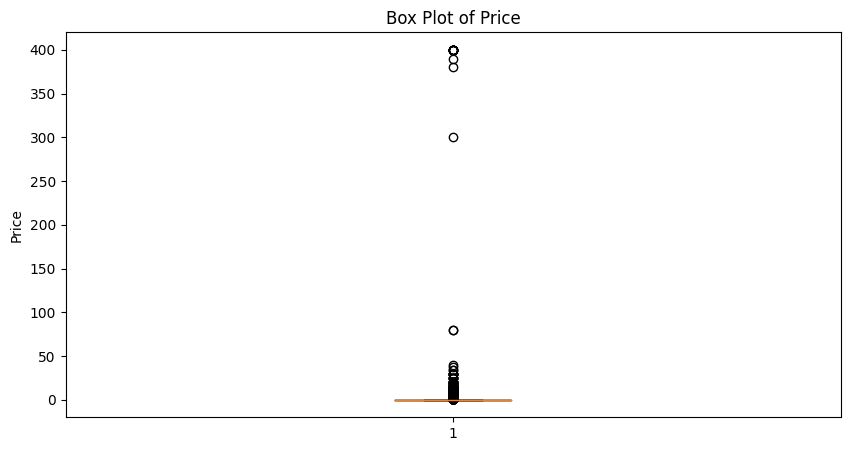

In [ ]:
import matplotlib.pyplot as plt

# Assuming inp1 is your DataFrame and 'Price' is the column you want to plot

plt.figure(figsize=(10, 5))
plt.boxplot(inp1['Price'])
plt.title('Box Plot of Price')
plt.ylabel('Price')
plt.show()


In [ ]:
# For the given dataset, calculate the IQR of the Price column.
inp1['Price'].describe() # (IQR) is calculated as the difference between the 75th percentile (Q3) and the 25th percentile (Q1)
# so IQR = Q3 - Q1 = 0.0 - 0.0 = 0.0

count    9359.000000
mean        0.961116
std        15.822478
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max       400.000000
Name: Price, dtype: float64

Analyze the price column

Identifying & handing outliers/extreme values

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
# When you use this command, any plot you create will be rendered and displayed below the code cell as soon as you call the plot's display function (like plt.show()).

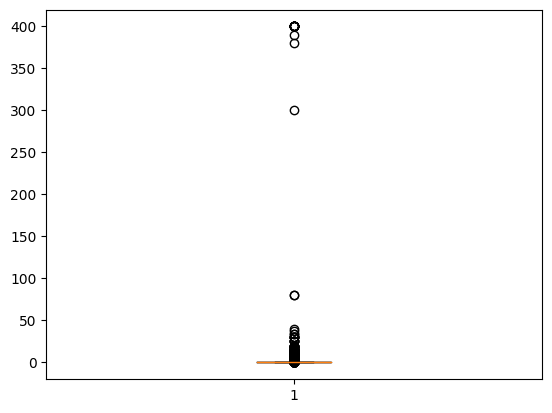

In [ ]:
plt.boxplot(inp1['Price'])
plt.show()

In [ ]:
#Check the apps with price more than 200
inp1[inp1.Price > 200]

App   Category  Rating  Reviews     Size  \
4197          most expensive app (H)     FAMILY     4.3        6   1500.0   
4362                      💎 I'm rich  LIFESTYLE     3.8      718  26000.0   
4367        I'm Rich - Trump Edition  LIFESTYLE     3.6      275   7300.0   
5351                       I am rich  LIFESTYLE     3.8     3547   1800.0   
5354                  I am Rich Plus     FAMILY     4.0      856   8700.0   
5355                   I am rich VIP  LIFESTYLE     3.8      411   2600.0   
5356               I Am Rich Premium    FINANCE     4.1     1867   4700.0   
5357             I am extremely Rich  LIFESTYLE     2.9       41   2900.0   
5358                      I am Rich!    FINANCE     3.8       93  22000.0   
5359              I am rich(premium)    FINANCE     3.5      472    965.0   
5362                   I Am Rich Pro     FAMILY     4.4      201   2700.0   
5364  I am rich (Most expensive app)    FINANCE     4.1      129   2700.0   
5366                       I Am Rich     FAMILY     3.6      217   4900.0   
5369                       I am Rich    FINANCE     4.3      180   3800.0   
5373              I AM RICH PRO PLUS    FINANCE     4.0       36  41000.0   

      Installs  Type   Price Content Rating         Genres       Last Updated  \
4197       100  Paid  399.99       Everyone  Entertainment      July 16, 2018   
4362     10000  Paid  399.99       Everyone      Lifestyle     March 11, 2018   
4367     10000  Paid  400.00       Everyone      Lifestyle        May 3, 2018   
5351    100000  Paid  399.99       Everyone      Lifestyle   January 12, 2018   
5354     10000  Paid  399.99       Everyone  Entertainment       May 19, 2018   
5355     10000  Paid  299.99       Everyone      Lifestyle      July 21, 2018   
5356     50000  Paid  399.99       Everyone        Finance  November 12, 2017   
5357      1000  Paid  379.99       Everyone      Lifestyle       July 1, 2018   
5358      1000  Paid  399.99       Everyone        Finance  December 11, 2017   
5359      5000  Paid  399.99       Everyone        Finance        May 1, 2017   
5362      5000  Paid  399.99       Everyone  Entertainment       May 30, 2017   
5364      1000  Paid  399.99           Teen        Finance   December 6, 2017   
5366     10000  Paid  389.99       Everyone  Entertainment      June 22, 2018   
5369      5000  Paid  399.99       Everyone        Finance     March 22, 2018   
5373      1000  Paid  399.99       Everyone        Finance      June 25, 2018   

     Current Ver   Android Ver  
4197         1.0    7.0 and up  
4362       1.0.0    4.4 and up  
4367       1.0.1    4.1 and up  
5351         2.0  4.0.3 and up  
5354         3.0    4.4 and up  
5355       1.1.1    4.3 and up  
5356         1.6    4.0 and up  
5357         1.0    4.0 and up  
5358         1.0    4.1 and up  
5359         3.4    4.4 and up  
5362        1.54    1.6 and up  
5364           2  4.0.3 and up  
5366         1.5    4.2 and up  
5369         1.0    4.2 and up  
5373       1.0.2    4.1 and up

As we can see these apps seem suspicious, and we cant rely on this data so lets remove it

In [ ]:
#Clean the Price column
inp1 = inp1[inp1.Price < 200]

In [ ]:
inp1.Price.describe()

count    9344.000000
mean        0.334463
std         2.169925
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max        79.990000
Name: Price, dtype: float64

<Axes: >

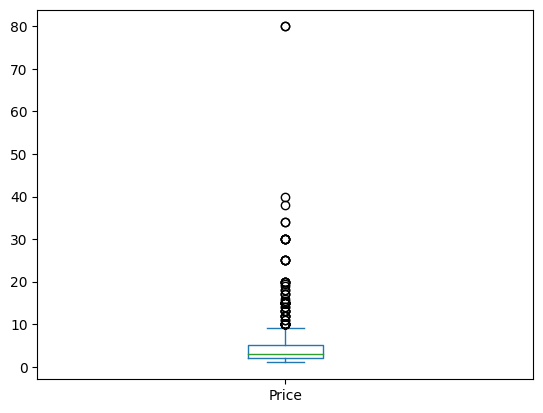

In [ ]:
#Create a box plot for paid apps
inp1[inp1.Price>0].Price.plot.box()

In [ ]:
#Check the apps with price more than 30
inp1[inp1.Price>30]

App   Category  Rating  Reviews     Size  \
2253  Vargo Anesthesia Mega App    MEDICAL     4.6       92  32000.0   
2301    A Manual of Acupuncture    MEDICAL     3.5      214  68000.0   
2365  Vargo Anesthesia Mega App    MEDICAL     4.6       92  32000.0   
2402    A Manual of Acupuncture    MEDICAL     3.5      214  68000.0   
2414               LTC AS Legal    MEDICAL     4.0        6   1300.0   
5360           I am Rich Person  LIFESTYLE     4.2      134   1800.0   

      Installs  Type  Price Content Rating     Genres     Last Updated  \
2253      1000  Paid  79.99       Everyone    Medical    June 18, 2018   
2301      1000  Paid  33.99       Everyone    Medical  October 2, 2017   
2365      1000  Paid  79.99       Everyone    Medical    June 18, 2018   
2402      1000  Paid  33.99       Everyone    Medical  October 2, 2017   
2414       100  Paid  39.99       Everyone    Medical    April 4, 2018   
5360      1000  Paid  37.99       Everyone  Lifestyle    July 18, 2017   

     Current Ver   Android Ver  
2253        19.0  4.0.3 and up  
2301      2.1.35    4.0 and up  
2365        19.0  4.0.3 and up  
2402      2.1.35    4.0 and up  
2414       3.0.1    4.1 and up  
5360         1.0  4.0.3 and up

As we can see, some of these apps are duplicates, others are still not legit (e.g. i am rich). Considering that these are either unusual or not legit, we can drop these.

In [ ]:
#Clean the Price column again
inp1 = inp1[inp1.Price <= 30]
inp1.shape

(9338, 13)

So, the two major takeaways from outlier analysis are as follows:

* Outliers in data can arise due to genuine reasons or because of dubious entries. In the latter case, you should go ahead and remove such entries immediately. Use a boxplot to observe, analyse and remove them.
* In the former case, you should determine whether or not removing them would add value to your analysis procedure.

Additional Notes:

* Several definitions exist for outliers for different contexts so that the correct procedure is followed for removing them. You can go through [this link](https://www.anodot.com/blog/quick-guide-different-types-outliers/) for more information.
* Box plots are utilised not just for outlier analysis, but can also be used to compare a certain numeric variable across different categories. You’ll learn about this method in the next session where we start analysing the data for insights using Seaborn.

### **Histograms**

Histograms can also be used in conjuction with boxplots for data cleaning and data handling purposes. You can use it to check the spread of a numeric variable. Histograms generally work by bucketing the entire range of values that a particular variable takes to specific __bins__. After that, it uses vertical bars to denote the total number of records in a specific bin, which is also known as its __frequency__.


Key points about histograms:

* Analyses numeric variables to visualise the frequency of records
* Divides the range of numerical values to specific buckets or bins
* Shows the number of records in each bin
* Helps in identifying buckets which have high frequency

Histograms generally work by bucketing the entire range of values that a particular variable takes to specific bins. After that, it uses vertical bars to denote the total number of records in a specific bin, which is also known as its frequency.

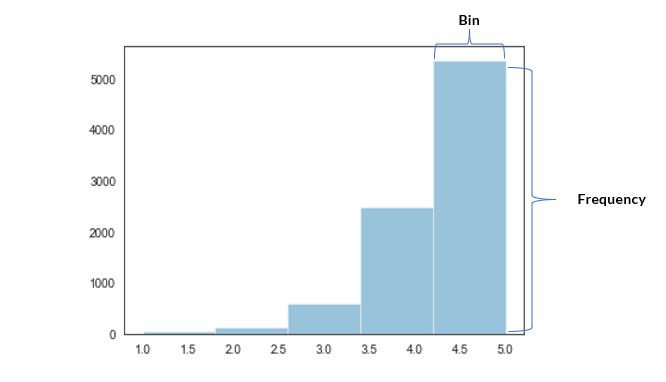

In [ ]:
# example of histogram
from IPython.display import Image
Image(filename='Histogram.png')
# this histogram indicates that the higher values are more frequent
# with the most frequent value being the bin with the highest values

You can adjust the number of bins to improve its granularity

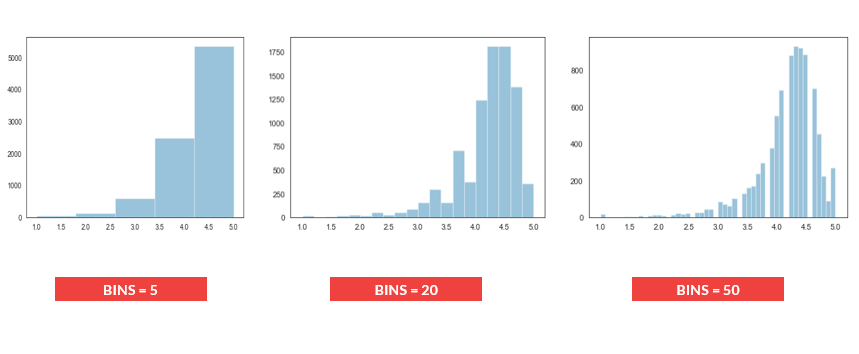

In [ ]:
Image(filename='Granular.png')
# with the more bins, we can get a more accurate picture of the data

As you can observe, increasing the bins to 20 gives a more in-depth analysis than the one with only 5 bins. You can keep on increasing the number of bins as per your requirement and make sure that there are enough bins to predict the trends in the data correctly. For example, the final image with 50 bins is too granular and even has gaps in-between; this indicates that no records occur in such a fine-tuned bin range, and therefore it is of not much use to us.

You'll be using plt.hist() to plot a histogram. Check out its official documentation:https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.hist.html

**Reviews**
How are reviews distributed?

In [ ]:
# see the options
help(plt.hist)

Help on function hist in module matplotlib.pyplot:

hist(x, bins=None, range=None, density=False, weights=None, cumulative=False, bottom=None, histtype='bar', align='mid', orientation='vertical', rwidth=None, log=False, color=None, label=None, stacked=False, *, data=None, **kwargs)
    Compute and plot a histogram.
    
    This method uses `numpy.histogram` to bin the data in *x* and count the
    number of values in each bin, then draws the distribution either as a
    `.BarContainer` or `.Polygon`. The *bins*, *range*, *density*, and
    *weights* parameters are forwarded to `numpy.histogram`.
    
    If the data has already been binned and counted, use `~.bar` or
    `~.stairs` to plot the distribution::
    
        counts, bins = np.histogram(x)
        plt.stairs(counts, bins)
    
    Alternatively, plot pre-computed bins and counts using ``hist()`` by
    treating each bin as a single point with a weight equal to its count::
    
        plt.hist(bins[:-1], bins, weights=coun

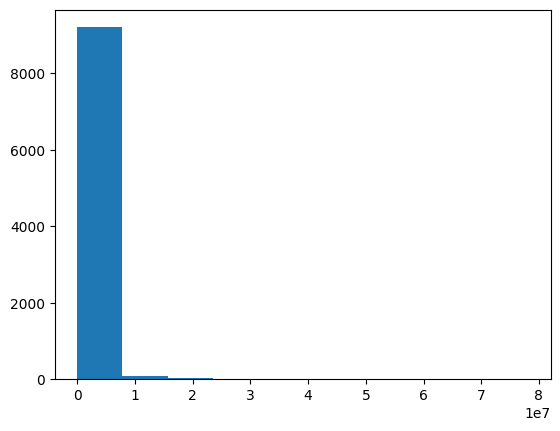

In [ ]:
#Create a histogram of the Reviews
plt.hist(inp1.Reviews)
plt.show()

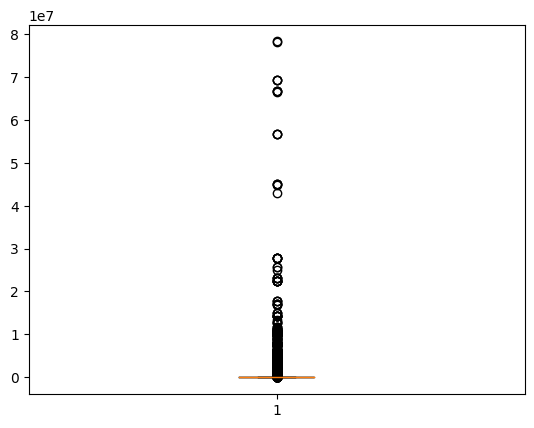

In [ ]:
#Create a boxplot of the Reviews column
plt.boxplot(inp1.Reviews)
plt.show()

In [ ]:
#Check records with 10 million reviews
inp1[inp1.Reviews > 10000000]

App       Category  \
335            Messenger – Text and Video Chat for Free  COMMUNICATION   
336                                  WhatsApp Messenger  COMMUNICATION   
342                                     Viber Messenger  COMMUNICATION   
378         UC Browser - Fast Download Private & Secure  COMMUNICATION   
381                                  WhatsApp Messenger  COMMUNICATION   
...                                                 ...            ...   
6449                        BBM - Free Calls & Messages  COMMUNICATION   
7536  Security Master - Antivirus, VPN, AppLock, Boo...          TOOLS   
7937                                     Shadow Fight 2           GAME   
8894  Cache Cleaner-DU Speed Booster (booster & clea...          TOOLS   
8896  DU Battery Saver - Battery Charger & Battery Life          TOOLS   

      Rating   Reviews          Size    Installs  Type  Price Content Rating  \
335      4.0  56642847  21516.529524  1000000000  Free    0.0       Everyone   
336      4.4  69119316  21516.529524  1000000000  Free    0.0       Everyone   
342      4.3  11334799  21516.529524   500000000  Free    0.0       Everyone   
378      4.5  17712922  40000.000000   500000000  Free    0.0           Teen   
381      4.4  69119316  21516.529524  1000000000  Free    0.0       Everyone   
...      ...       ...           ...         ...   ...    ...            ...   
6449     4.3  12843436  21516.529524   100000000  Free    0.0       Everyone   
7536     4.7  24900999  21516.529524   500000000  Free    0.0       Everyone   
7937     4.6  10981850  88000.000000   100000000  Free    0.0   Everyone 10+   
8894     4.5  12759815  15000.000000   100000000  Free    0.0       Everyone   
8896     4.5  13479633  14000.000000   100000000  Free    0.0       Everyone   

             Genres    Last Updated         Current Ver         Android Ver  
335   Communication  August 1, 2018  Varies with device  Varies with device  
336   Communication  August 3, 2018  Varies with device  Varies with device  
342   Communication   July 18, 2018  Varies with device  Varies with device  
378   Communication  August 2, 2018         12.8.5.1121          4.0 and up  
381   Communication  August 3, 2018  Varies with device  Varies with device  
...             ...             ...                 ...                 ...  
6449  Communication  August 2, 2018  Varies with device        4.0.3 and up  
7536          Tools  August 4, 2018               4.6.6  Varies with device  
7937         Action    July 2, 2018              1.9.38          3.0 and up  
8894          Tools   July 25, 2018               3.1.2          4.0 and up  
8896          Tools    June 5, 2018             4.8.7.8          4.0 and up  

[92 rows x 13 columns]

This reveals that lots of pre-installed and superstar apps are present in the data. These apps won’t be useful for our analysis since they already have skewed statistics (an extremely high number of installs and reviews), which is not common for a majority of the rest of the apps. Hence, you took a qualifier of 1 million reviews and removed all the apps having more reviews.

In [ ]:
#Drop records with more than 1M reviews
inp1 = inp1[inp1.Reviews <= 1000000]
inp1.shape

(8634, 13)

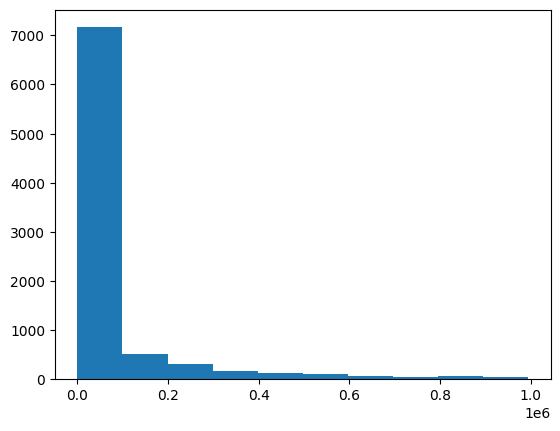

In [ ]:
#Question - Create a histogram again and check the peaks
plt.hist(inp1.Reviews)
plt.show()

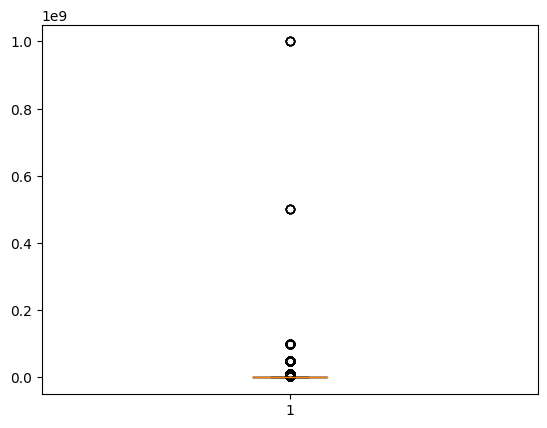

In [ ]:
#Question - Create a box plot for the Installs column and report back the IQR
plt.boxplot(inp1.Installs)
plt.show()

Now, go ahead and analyse the Installs and the Size columns as well in the following questions

Note that you can check the video solutions for verifying your approach.

In [ ]:
# report the IQR
inp1.Installs.describe()  # 1.000000e+06 - 1.000000e+04
# IQR = 990,000, or 9.9 * 10^5

count    8.634000e+03
mean     4.288536e+06
std      2.864650e+07
min      5.000000e+00
25%      1.000000e+04
50%      1.000000e+05
75%      1.000000e+06
max      1.000000e+09
Name: Installs, dtype: float64

In [ ]:
#Question - CLean the Installs by removing all the apps having more than or equal to 100 million installs
inp1 = inp1[inp1.Installs <= 100000000]

# Evaluate the shape of the data
inp1.shape

(8624, 13)

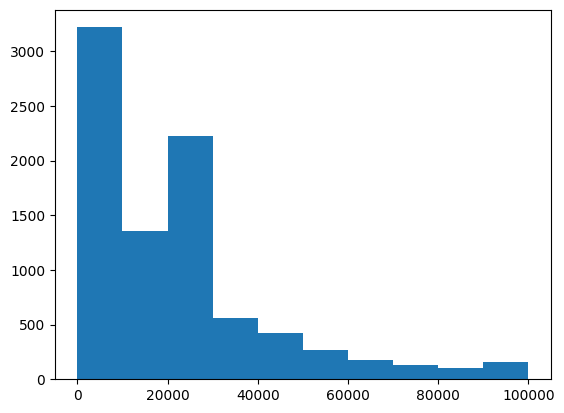

In [ ]:
# Plot a histogram for Size as well.
plt.hist(inp1.Size)
plt.show()
#Once you create the histogram, it is clearly visible that the first three peaks
#outweigh the rest of the bars, and hence you can say that a majority of apps have a size less than 30,000.

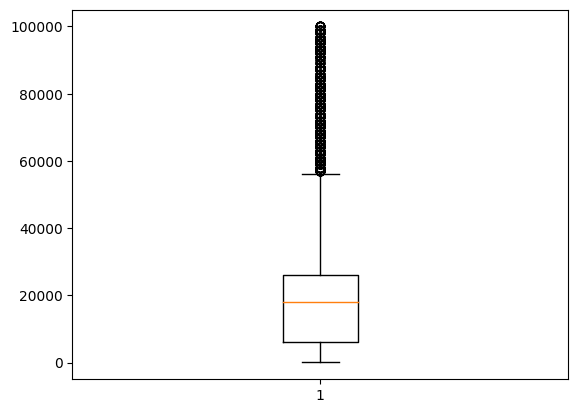

In [ ]:
#Question - Create a boxplot for the Size column and report back the median value
plt.boxplot(inp1.Size)
plt.show()

In [ ]:
# report back the median value
inp1.Size.describe()

count      8624.000000
mean      21634.926354
std       20668.248638
min           8.500000
25%        6000.000000
50%       18000.000000
75%       26000.000000
max      100000.000000
Name: Size, dtype: float64

Histograms vs Bar Plots

You have already studied bar plots in the previous module. Now it is a common misconception to confuse them with histograms. To understand the difference try analysing the following two situations and then choose the correct option:



Situation A - You want to visualise the total number of runs scored by MS Dhoni in a single year against all the teams he has played against.

Situation B - You want to visualise the spread of the runs scored by MS Dhoni in a single year.

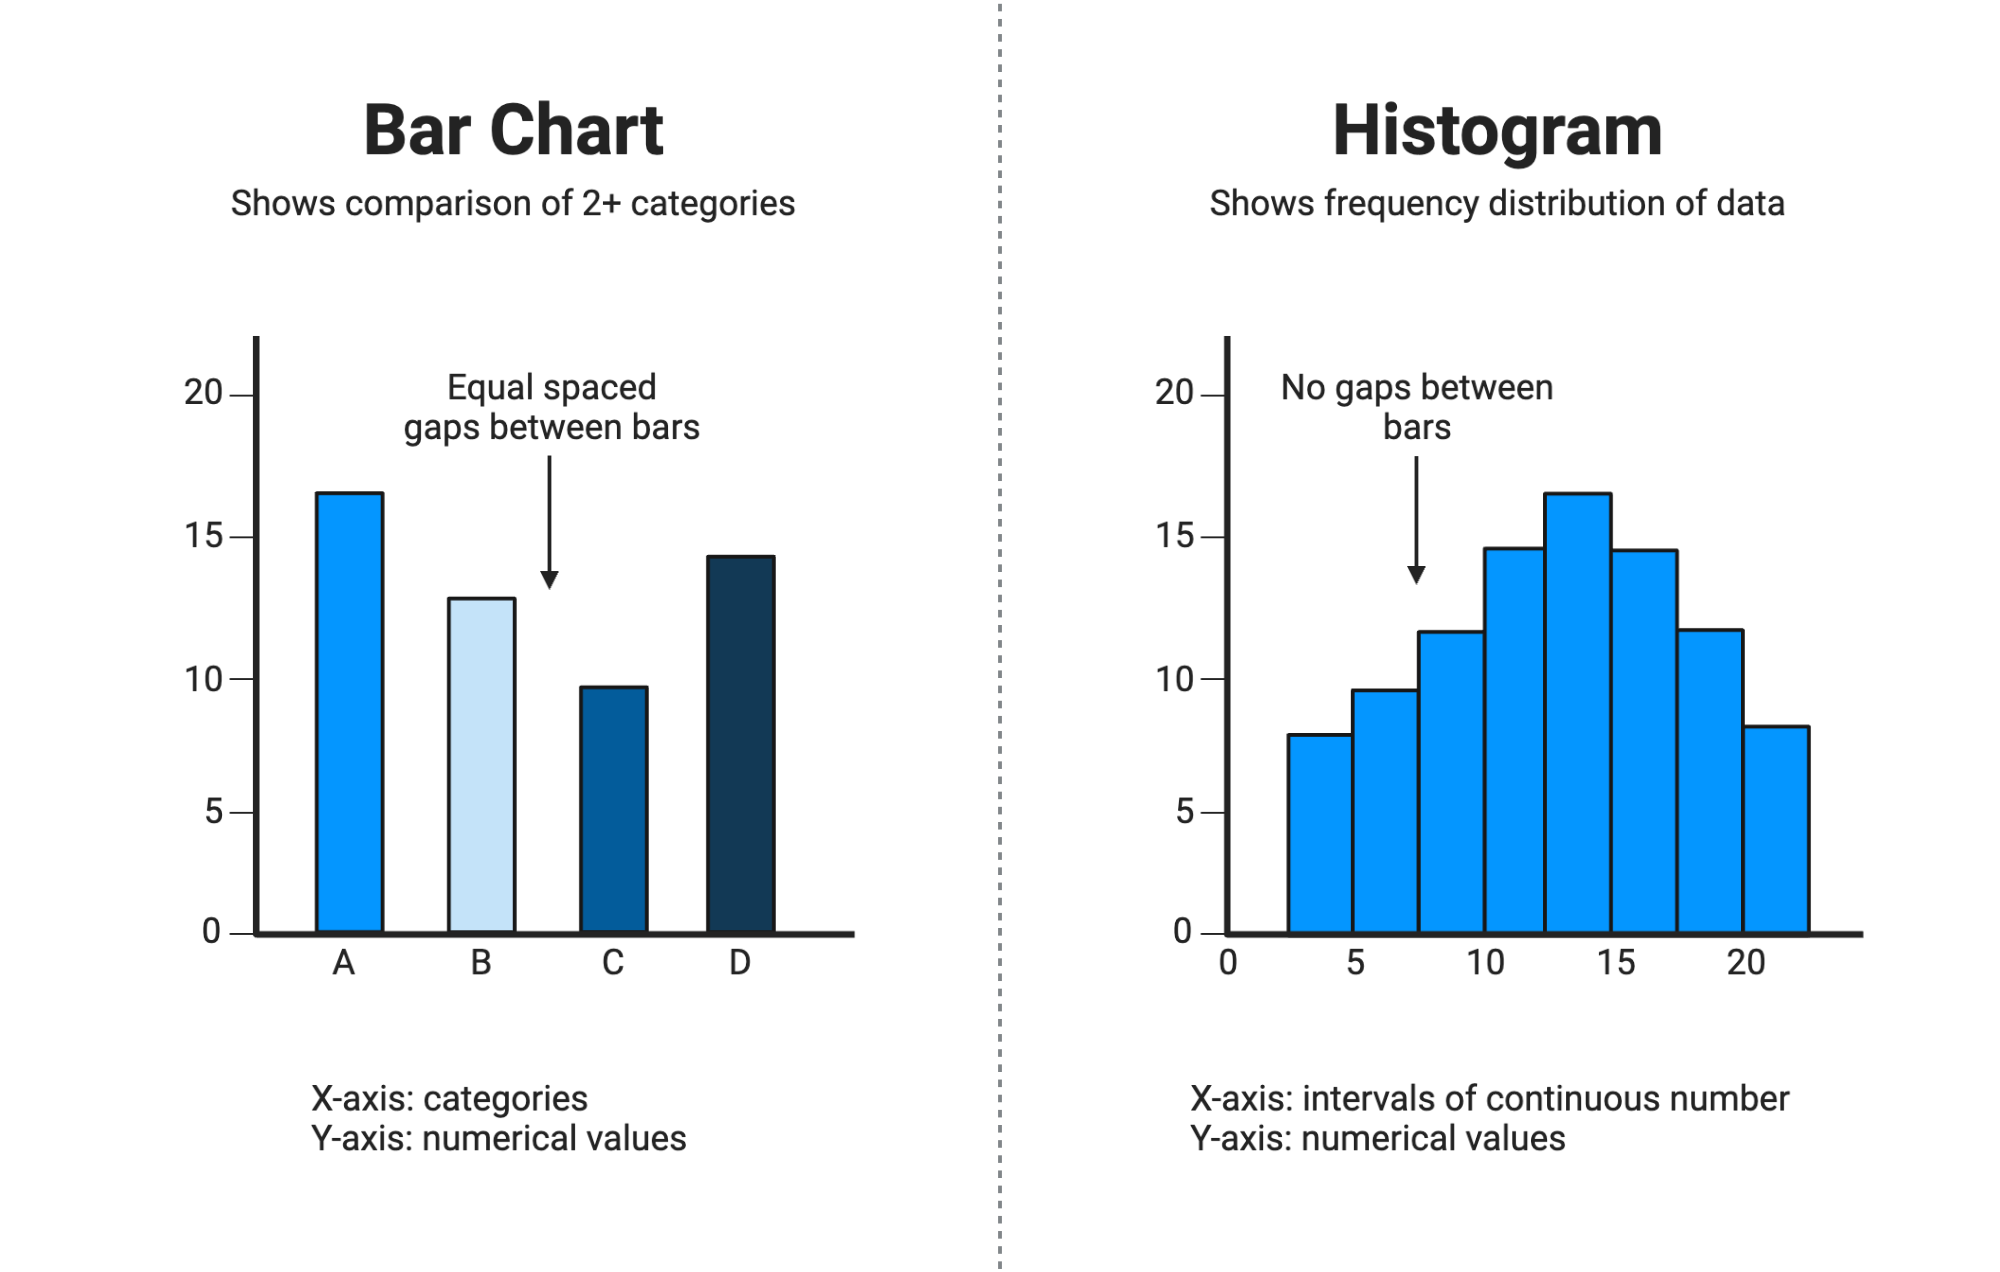

In [ ]:
# display histogram_vs_barplots.png
Image(filename='histogram_vs_barplots.png')

Solution: Situation A requires a bar plot whereas Situation B requires a histogram.

Explanation:
A Histogram plots the frequency of a numeric variable, whereas the Bar plot shows the aggregation of a certain numerical entity for some categorical variable. In Situation A, you are analysing the total sum of runs, which is a numeric variable for all the teams, which is a categorical variable. Hence it will need a bar plot. For Situation B, you're understanding the spread of a numeric variable by checking the frequency. Hence a histogram will be used here.


Summary:
* Bar Plot: Shows comparison between different groups.
* Histogram: Shows the general pattern or spread of numerical data

3 Key Takeaways:
- before we calculate the mean, or draw any conclusions from a dataset, we first have to clean it, make sure data is legit, and representative. It may makes sense to remove extreme values if they represent extreme, rare outliers (e.g. superapps). We also have to do sanity checks, to ensure the data is correct (e.g. in a ratings column (1-5)), all values must fall between 1-5.
- IQR = Q3 - Q1
- .plot.box() is a quick way to get boxplot, e.g. inp1[inp1.Price>0].Price.plot.box()


# **Practice Questions**

In [ ]:
#Import all the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### I - Virat Kohli Dataset

In [ ]:
df = pd.read_csv("virat.csv")
df.head()

Runs Mins  BF  4s  6s     SR  Pos Dismissal  Inns   Opposition  \
0   12   33  22   1   0  54.54    2       lbw     1  v Sri Lanka   
1   37   82  67   6   0  55.22    2    caught     2  v Sri Lanka   
2   25   40  38   4   0  65.78    1   run out     1  v Sri Lanka   
3   54   87  66   7   0  81.81    1    bowled     1  v Sri Lanka   
4   31   45  46   3   1  67.39    1       lbw     2  v Sri Lanka   

          Ground Start Date  
0       Dambulla  18-Aug-08  
1       Dambulla  20-Aug-08  
2  Colombo (RPS)  24-Aug-08  
3  Colombo (RPS)  27-Aug-08  
4  Colombo (RPS)  29-Aug-08

#### Spread in Runs
Question 1: Analyse the spread of Runs scored by Virat in all his matches and report the difference between the scores at the 50th percentile and the 25th percentile respectively.

    a)16.5
    b)22.5
    c)26.5
    d)32.5

In [ ]:
# First, check out if the data in the 'Runs' column is numeric
df['Runs'].describe() # as we can see its object, not numeric

count     132
unique     83
top         0
freq       10
Name: Runs, dtype: object

In [ ]:
# now lets print the rows with NaN values in df['Runs']
df[df['Runs'].isna()] # seesms like NaN values are not the issue

Empty DataFrame
Columns: [Runs, Mins, BF, 4s, 6s, SR, Pos, Dismissal, Inns, Opposition, Ground, Start Date]
Index: []

In [ ]:
# check NaN values for all columns with the count method
df['Runs'].value_counts()
# here we can see that the issue is star in the end, so we have to remove star in the end

Runs
0      10
2       5
12      4
37      4
1       4
       ..
77*     1
26      1
43      1
64      1
55      1
Name: count, Length: 83, dtype: int64

In [ ]:
# Attempt to convert 'Runs' to numeric and identify non-convertible values
df['Runs_numeric'] = pd.to_numeric(df['Runs'], errors='coerce')

# Find rows where conversion failed (i.e., non-numeric values are now NaN)
non_numeric_rows = df[df['Runs_numeric'].isna()]

# Display these rows to understand what the non-numeric values are
print(non_numeric_rows)

     Runs Mins   BF  4s  6s      SR  Pos Dismissal  Inns      Opposition  \
5      2*    6    2   0   0     100    7   not out     1     v Sri Lanka   
12   102*  128   95  11   0  107.36    3   not out     2    v Bangladesh   
24    63*   83   70   6   2      90    3   not out     2   v New Zealand   
30    87*  126   92   7   2   94.56    3   not out     2  v South Africa   
32   100*  113   83   8   2  120.48    4   not out     1    v Bangladesh   
49   112*  134   98  16   0  114.28    4   not out     2       v England   
51    86*    -   99  11   0   86.86    4   not out     2       v England   
56    23*   15   11   3   0  209.09    6   not out     1   v West Indies   
66   128*  187  119  12   1  107.56    3   not out     2     v Sri Lanka   
73    77*  110   79   9   2   97.46    3   not out     2       v England   
81    68*  128   88   5   1   77.27    3   not out     2      v Zimbabwe   
83   100*   82   52   8   7   192.3    3   not out     2     v Australia   
85   115*  1

In [ ]:
# lets remove the star in the end from all values in Runs. Leave values unchanged if no * is in the end
df['Runs'] = df['Runs'].str.replace('*', '')

# now lets convert all the values in runs from str to numeric, integer
df['Runs'] = pd.to_numeric(df['Runs'])

In [ ]:
# check NaN values for all columns with the count method
df['Runs'].value_counts()
# here we can see that the issue is star in the end, so we have to remove star in the end

Runs
0      10
2       6
1       5
12      4
37      4
       ..
21      1
128     1
6       1
15      1
55      1
Name: count, Length: 75, dtype: int64

In [ ]:
# Analyse the spread of Runs scored by Virat in all his matches
# Calculate the 25th and 50th percentiles
percentile_25 = df['Runs'].quantile(0.25)
percentile_50 = df['Runs'].quantile(0.50)

# Calculate the difference between the 50th and 25th percentiles
difference = percentile_50 - percentile_25

In [ ]:
# report the difference between the scores at the 50th percentile and the 25th percentile respectively.
# Print the results
print("25th Percentile:", percentile_25)
print("50th Percentile:", percentile_50)
print("Difference between 50th and 25th percentiles:", difference)

25th Percentile: 10.0
50th Percentile: 32.5
Difference between 50th and 25th percentiles: 22.5


Quick solution:

In [ ]:
# First, you need to observe that the Runs column in the dataset is of object type because of some scores having an asterisk (*) symbol along with them, indicating that Virat was not out in that match (Check the dictionary if you have any doubt).
df['Runs'].describe() # as we can see its object, not numeric

count    132.000000
mean      46.848485
std       41.994635
min        0.000000
25%       10.000000
50%       32.500000
75%       80.250000
max      154.000000
Name: Runs, dtype: float64

In [ ]:
# Remove the asterisk symbol using a condition and the apply() function and convert the data type.
df['Runs']= df['Runs'].apply(lambda x: int(x[:-1]) if x[-1]=="*" else int(x))

TypeError: 'int' object is not subscriptable

In [ ]:
df['Runs'].value_counts()

Runs
0      10
2       6
1       5
12      4
37      4
       ..
21      1
128     1
6       1
15      1
55      1
Name: count, Length: 75, dtype: int64

Once the necessary data cleaning tasks are done, use a describe() function, with percentiles parameter set at 0.25, 0.5 and 1.

In [ ]:
df['Runs'].describe()

count    132.000000
mean      46.848485
std       41.994635
min        0.000000
25%       10.000000
50%       32.500000
75%       80.250000
max      154.000000
Name: Runs, dtype: float64

In [ ]:
df['Runs'].describe(percentiles = [0.25,0.5,1])  # Specifying 1 (or 100%) in the describe() function is a way to explicitly ask for the maximum value to be displayed as part of the output.
# its not necessary to include 1

count    132.000000
mean      46.848485
std       41.994635
min        0.000000
25%       10.000000
50%       32.500000
100%     154.000000
max      154.000000
Name: Runs, dtype: float64

This gives the value at 25th percentile as 10.00 and at 50th percentile as 32.5. Hence, the difference comes out to be 32.5-10.00 = 22.5.

**Box Plots**

Plot a Box Plot to analyse the spread of Runs that Virat has scored. The upper fence in the box plot lies in which interval?

Question 2: Plot a Box Plot to analyse the spread of Runs that Virat has scored. The upper fence in the box plot lies in which interval?

    a)100-120
    b)120-140
    c)140-160
    d)160-180


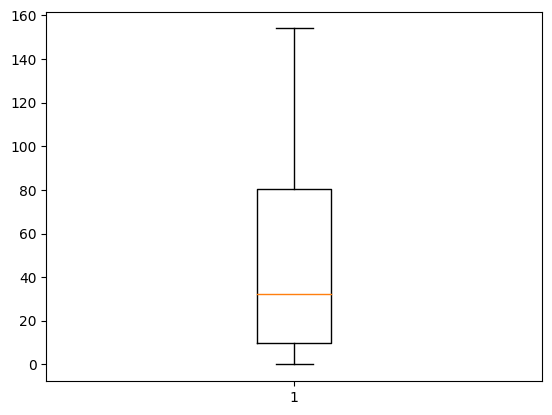

In [ ]:
# Plot a Box Plot to analyse the spread of Runs that Virat has scored
plt.boxplot(df['Runs'])
plt.show()
# as we can see upper fence lies in interval 140-160

Question 3: False Statement

Q3:Consider the following statements and choose the correct option

     I - Virat has played the maximum number of matches in 2011
     II - Virat has the highest run average in the year 2017
     III - Virat has the maximum score in a single match and the highest run average in the year 2016.

Which of the above statements is/are false?

    a)I and II
    b)I and III
    c)II
    d)III


[Hint: For solving this question, you first need to extract the year from the 'Start Date' column and store it in a separate column before proceeding to verify each of the statements mentioned above]

In [ ]:
# extract the year from the 'Start Date' column and store it in a seperate Column called 'Year'
df['Year'] = pd.DatetimeIndex(df['Start Date']).year

In [ ]:
# Count matches per year
matches_per_year = df['Year'].value_counts()

# Find the year with the maximum matches
max_matches_year = matches_per_year.idxmax()
print("Year with maximum matches:", max_matches_year)
print(matches_per_year)

Year with maximum matches: 2011
Year
2011    31
2013    23
2014    17
2010    16
2012    11
2015    10
2016    10
2009     6
2008     5
2017     3
Name: count, dtype: int64


In [ ]:
# Convert runs to numeric, ensuring no non-numeric values interfere
df['Runs'] = pd.to_numeric(df['Runs'], errors='coerce')

# Group by year and calculate mean runs
average_runs_per_year = df.groupby('Year')['Runs'].mean()

# Find the year with the highest run average
max_average_year = average_runs_per_year.idxmax()
print("Year with highest run average:", max_average_year)
print(average_runs_per_year)


Year with highest run average: 2016
Year
2008    31.800000
2009    38.333333
2010    45.375000
2011    42.000000
2012    40.363636
2013    47.826087
2014    58.529412
2015    30.400000
2016    73.900000
2017    61.666667
Name: Runs, dtype: float64


In [ ]:
# Find the maximum score overall
max_score = df['Runs'].max()
max_score_year = df[df['Runs'] == max_score]['Year'].iloc[0]

# Compare the year of the highest average and the year of the maximum score
print("Year with maximum score:", max_score_year)

Year with maximum score: 2016


Statement Analysis
1. Statement I: "Virat has played the maximum number of matches in 2011."

* Analysis: According to your output, Virat played the maximum number of matches in 2011 with 31 matches. This statement is true.

2. Statement II: "Virat has the highest run average in the year 2017."

* Analysis: The highest run average was in 2016 with an average of 73.9 runs. The run average for 2017 was 61.666667. This statement is false.

3. Statement III: "Virat has the maximum score in a single match and the highest run average in the year 2016."

* Analysis: The highest run average was indeed in 2016, and the maximum score was also in 2016. This statement is true.

Conclusion
* Option c) II is the correct answer, as it correctly identifies Statement II as the false statement.

**Solution**

In [ ]:
# First, you have to do some formatting to the ‘Start Date’ column to get the year in which the match was played.
df['Start Date']= df['Start Date'].apply(lambda x: (x[-2:]))

In [ ]:
# After that, do a value_counts() to find the number of matches played in each year.
df['Start Date'].value_counts()

Start Date
11    31
13    23
14    17
10    16
12    11
15    10
16    10
09     6
08     5
17     3
Name: count, dtype: int64

In [ ]:
# Next, create a pivot table with the ‘Start Date’ entities as the columns, values set to ‘Runs’, and aggfunc() set to np.mean and np.max.
pd.pivot_table(df, values='Runs',columns=['Start Date'], aggfunc=np.mean)
pd.pivot_table(df, values='Runs',columns=['Start Date'], aggfunc=np.max)

Start Date  08   09   10   11   12   13   14   15   16   17
Runs        54  107  118  117  128  115  139  138  154  122

#### Maximum Frequency

Q4:Plot a histogram for the Mins column with 15 bins. Among the three ranges mentioned below, which one has the highest frequency?

A - [54.6,68)

B - [68,81.4)

C - [121.6,135)

    a)A - [54.6,68)
    b)B - [68,81.4)
    c)C - [121.6,135)
    d)All the bin ranges have the same frequency


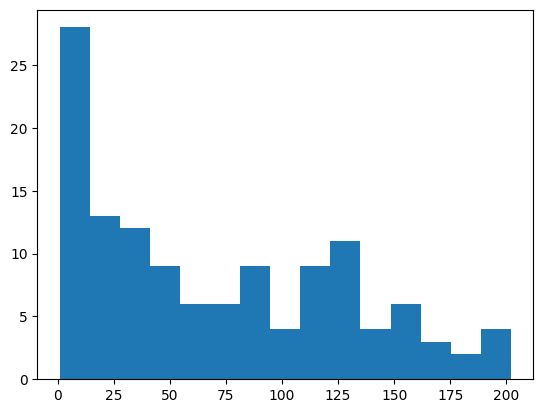

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Convert 'Mins' to numeric, coercing errors to NaN
df['Mins'] = pd.to_numeric(df['Mins'], errors='coerce')

# Drop any rows where 'Mins' is NaN if you want to exclude them from the histogram
df = df.dropna(subset=['Mins'])

# Now plot the histogram
data = df['Mins']
counts, bin_edges = np.histogram(data, bins=15)
plt.hist(data, bins=15)
plt.show()

In [ ]:
print(df['Mins'].describe())

count    126.000000
mean      70.492063
std       57.270131
min        1.000000
25%       18.250000
50%       56.000000
75%      120.750000
max      202.000000
Name: Mins, dtype: float64


In [ ]:
# Define the ranges to check
ranges = {
    "A": (54.6, 68),
    "B": (68, 81.4),
    "C": (121.6, 135)
}

# Function to find the bin index for a given value
def find_bin(value, edges):
    for i in range(len(edges) - 1):
        if edges[i] <= value < edges[i+1]:
            return i
    return -1  # In case the value is out of the range of the bins

# Store frequencies for the specified ranges
range_frequencies = {}
for key, (lower, upper) in ranges.items():
    # Find bin indices that overlap with the range
    lower_idx = find_bin(lower, bin_edges)
    upper_idx = find_bin(upper, bin_edges)
    # Calculate the sum of counts in these bins
    range_frequencies[key] = sum(counts[lower_idx:upper_idx+1])

# Output the frequencies for comparison
print(range_frequencies)

# Find the range with the maximum frequency
max_freq_range = max(range_frequencies, key=range_frequencies.get)
print("Range with the highest frequency:", max_freq_range)

{'A': 12, 'B': 15, 'C': 24}
Range with the highest frequency: C


In [ ]:
# Solution provided

In [ ]:
# Observe that the Mins column is also of an object type. This is due to the fact the some of the records are erroneous and have a ‘-’ value instead of a number. Therefore, we need to drop these records and convert the entire column to an int type column. Again, this can be done by using the qualifier [~(df['Mins']== "-")]. The code is as follows:
df2 = df[~(df['Mins']== "-")]
df2['Mins'] = df2['Mins'].apply(lambda x: int(x))

(array([28., 13., 12.,  9.,  6.,  6.,  9.,  4.,  9., 11.,  4.,  6.,  3.,
         2.,  4.]),
 array([  1. ,  14.4,  27.8,  41.2,  54.6,  68. ,  81.4,  94.8, 108.2,
        121.6, 135. , 148.4, 161.8, 175.2, 188.6, 202. ]),
 <BarContainer object of 15 artists>)

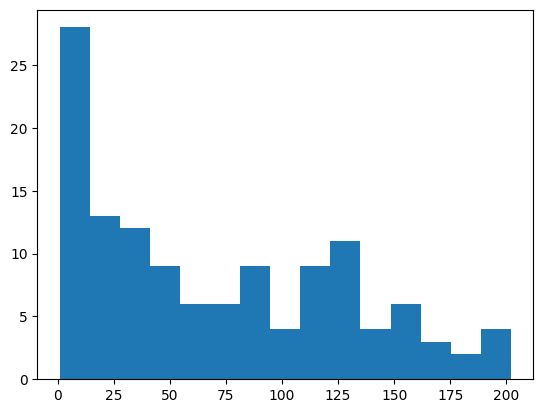

In [ ]:
# Then, just create a histogram in matplotlib with bins=15.
plt.hist(df2.Mins, bins = 15)
#  Once that is done, you can observe that [121.6, 135) has the maximum frequency.

# **Data Visualisation with Seaborn**

Seaborn is used predominantly to create beautiful and aesthetic statistical plots in Python.
* Python library to create statistical graphs easily
* Built on top of matplolib and closely integrated with pandas
* Functionalities of seaborn:
  * Dataset oriented API, for examining relationships between multiple variables
  * Analysing univariate and bivariate distributions, comparing them to subsets of data
  * Automatic estimation and plotting of linear regression models
  * Convenient views for complex datasets
  * Concise control over style
  * Colour palettes

Check out official documentation:
https://seaborn.pydata.org/tutorial/introduction

**Distribution Plots**

In the previous session, you learnt about the basic data-handling and data-cleaning tasks that were essential to be performed. In this session, you will begin the journey with Seaborn library and start extracting insights. Recall that the **target variable for this case study is the Rating column**. The main task is to analyse this column and compare it with other variables to observe how the ratings change through different categories.

Among the visualisations that you’ve learnt so far, which ones can be used for the Rating column and why?

Bar charts, histograms, and box plots:
*  Bar charts can be used to understand how ratings change across different categories,
* Histograms can be used to visualize the distribution of rating values, and
* Box plots can be used to identify the median, quartiles, and potential outliers within the ratings data.

First, you’ll learn how to build a distribution plot for the 'Rating' column, which is pretty similar to the histograms that you saw earlier in matplotlib.

### Session 2 - Data Visualisation with Seaborn

Seaborn is Python library to create statistical graphs easily. It is built on top of matplotlib and closely integrated with pandas.

_Functionalities of Seaborn_ :

- Dataset oriented API
- Analysing univariate and bivariate distributions
- Automatic estimation and plotting of  linear regression models
- Convenient views for complex datasets
- Concise control over style
- Colour palettes


#### Distribution Plots

A distribution plot is pretty similar to the histogram functionality in matplotlib. Instead of a frequency plot, it plots an approximate probability density for that rating bucket. And the curve (or the __KDE__) that gets drawn over the distribution is the approximate **probability density curve**.

The following is an example of a distribution plot. Notice that now instead of frequency on the left axis, it has the density for each bin or bucket.

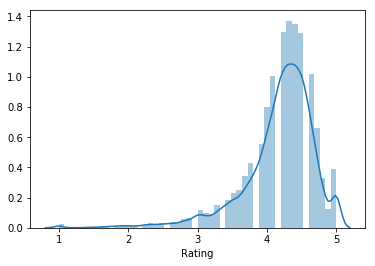

In [ ]:
# display image distplot.png with pythn display method
from IPython.display import Image, display
display(Image(filename='Distplot.png'))

**Data analysis to answer business questions**

In [ ]:
#import the necessary libraries
import warnings
warnings.filterwarnings('ignore') # seaborn has a lot of warnings which are distractive, so lets get rid of them
import seaborn as sns

You'll be using sns.distplot for plotting a distribution plot. Check out its official documentation: https://seaborn.pydata.org/generated/seaborn.distplot.html

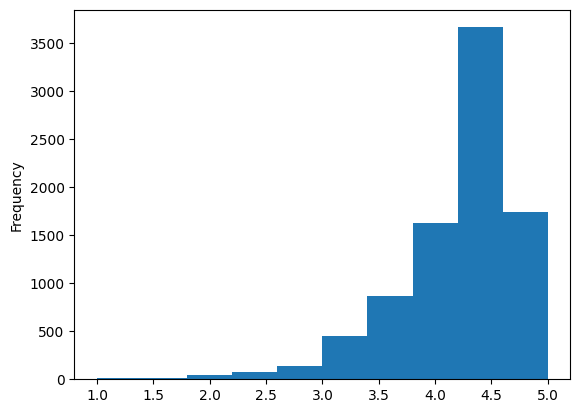

In [ ]:
#Create a distribution plot for rating
inp1.Rating.plot.hist()
plt.show()

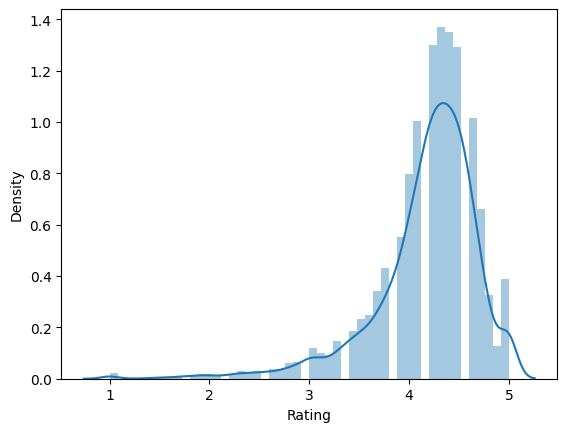

In [ ]:
sns.distplot(inp1.Rating)
plt.show() # y achses is now density instead of frequency
# number of bins has changed

Note that in sns, u used **distplot or distribution plot** instead of hist commany. The corresponding Seaborn command is

```
sns.distplot(inp1.Rating)
```

More about seaborn.distplot:

seaborn.distplot(a=None, bins=None, hist=True, kde=True, rug=False, fit=None, hist_kws=None, kde_kws=None, rug_kws=None, fit_kws=None, color=None, vertical=False, norm_hist=False, axlabel=None, label=None, ax=None, x=None)

DEPRECATED

This function has been deprecated and will be removed in seaborn v0.14.0. It has been replaced by histplot() [link text](https://seaborn.pydata.org/generated/seaborn.histplot.html#seaborn.histplot) and displot() [link text](https://seaborn.pydata.org/generated/seaborn.displot.html#seaborn.displot), two functions with a modern API and many more capabilities.



Coming back to the visualisation, the bars that get plotted in both the cases are proportional. For example, the maximum frequency occurs around the 4-4.5 bucket in the histogram plotted by matplotlib. Similarly, the maximum density also lies in the 4-4.5 bucket in the distplot.



The advantage of the distplot view is that it adds a layer of probability distribution without any additional inputs and preserves the same inter-bin relationship as in the Matplotlib version. This statistical view of things is also far more informative and aesthetic than the earlier one.

Question 1: Distplot

If you want a view like the one shown below for the Rating column, the corresponding code that you would need to add would be?

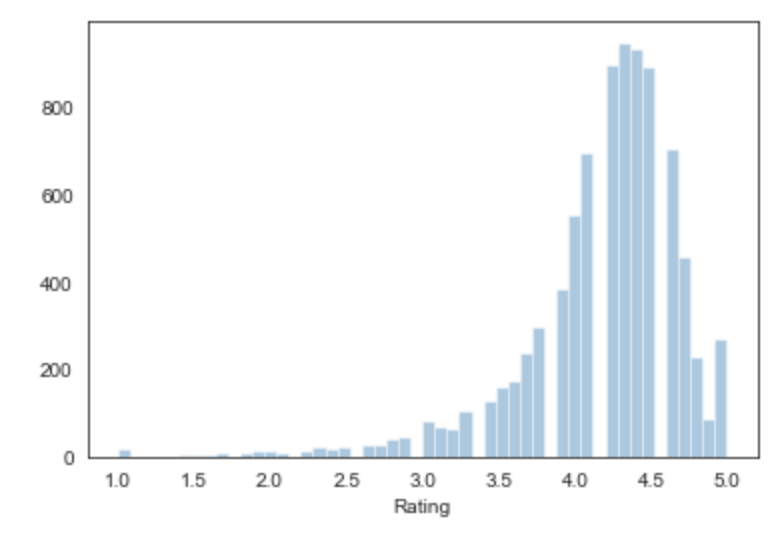

In [ ]:
# display Distplot.png
Image(filename='Distplot2.png')

<Axes: xlabel='Rating'>

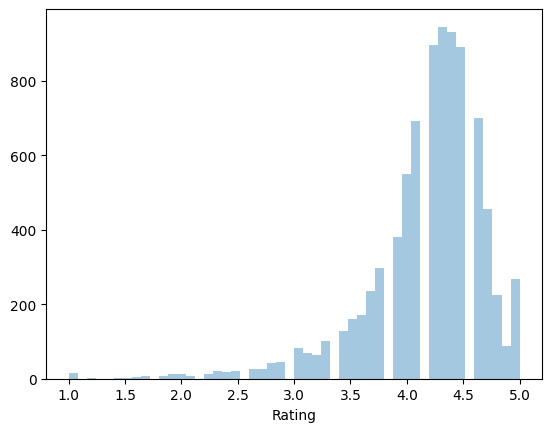

In [ ]:
# Solution
sns.distplot(inp1.Rating,kde = False) # kde=False means that no overlaying curve is shown
# The KDE parameter in the distplot checks whether a Gaussian Density Estimate is required or not. By default, it is set as True. Hence, setting the KDE as False would produce only the distribution plot shown above.

Question2: Distplot bins

Observe that there are certain gaps in the distplot view that we have shown above. This is because the number of bins created is quite high and hence some bins/buckets have no density at all. Now, you wish to set the number of bins to 15 to remove those gaps. Which of the following distplots shows the number of bins set to 15?



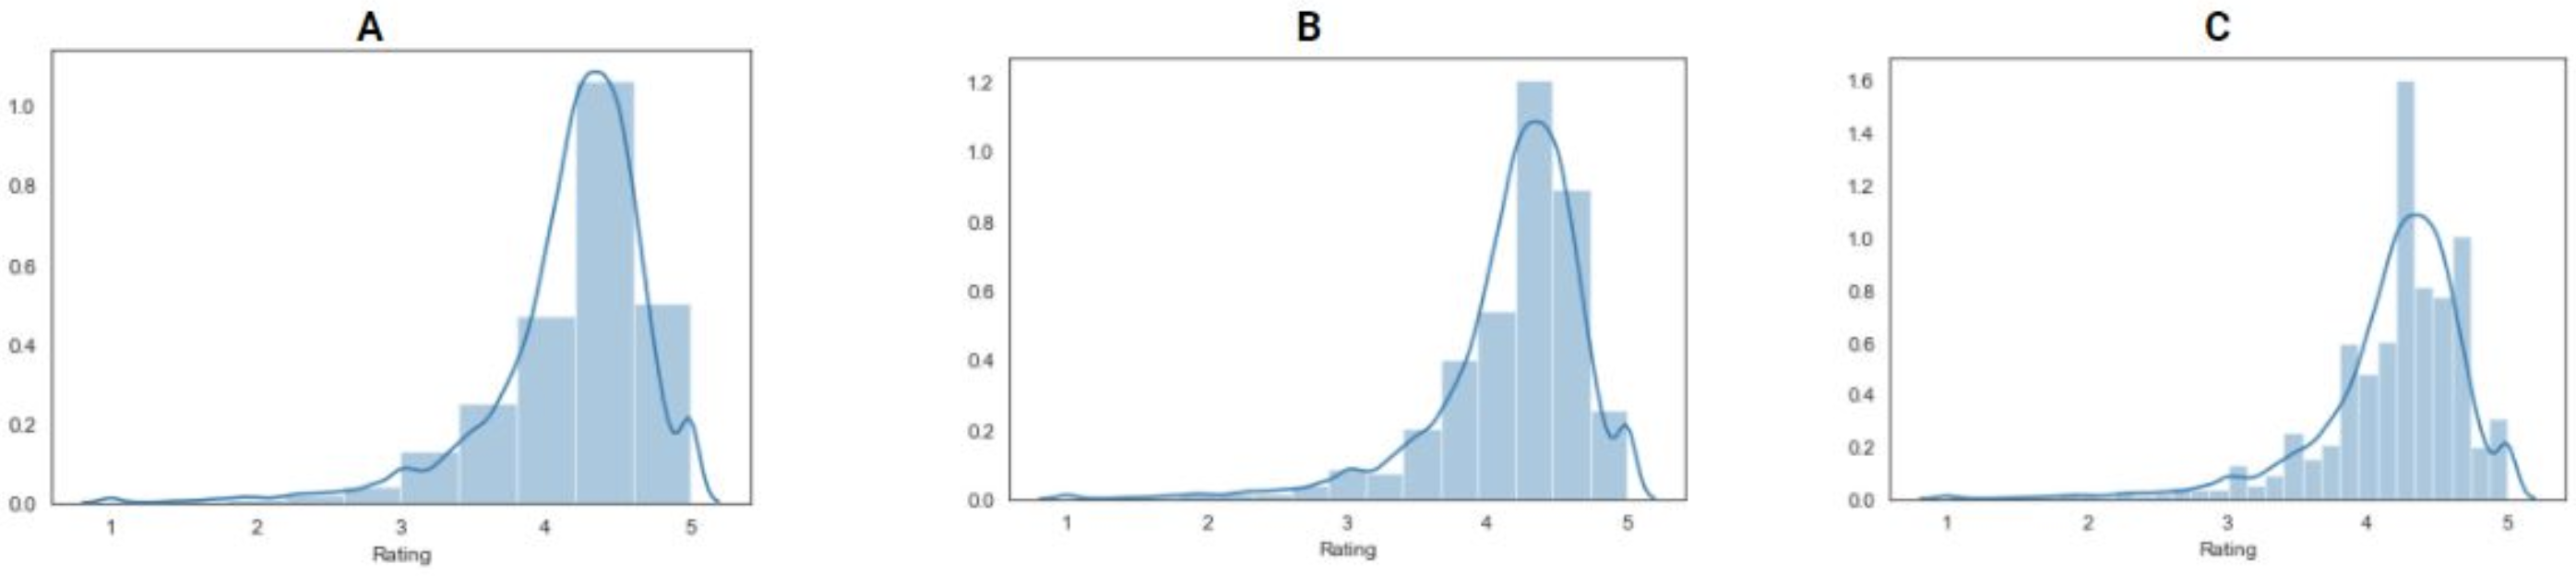

In [ ]:
# display image q2_plot.png
Image(filename='q2_plot.png')

<Axes: xlabel='Rating', ylabel='Density'>

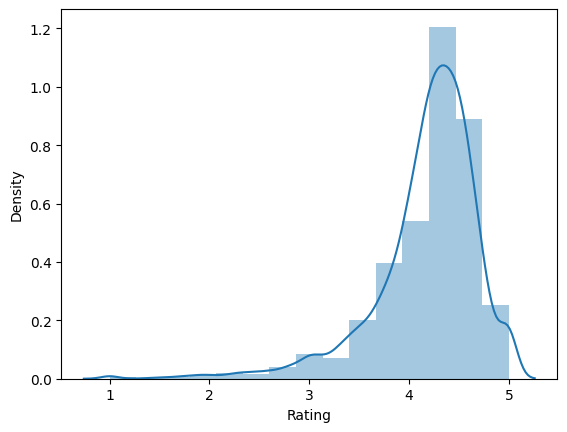

In [ ]:
sns.distplot(inp1.Rating, bins=15) # B is the solution

Q3: Customise

To get the following view, which parameter needs to be set correctly?

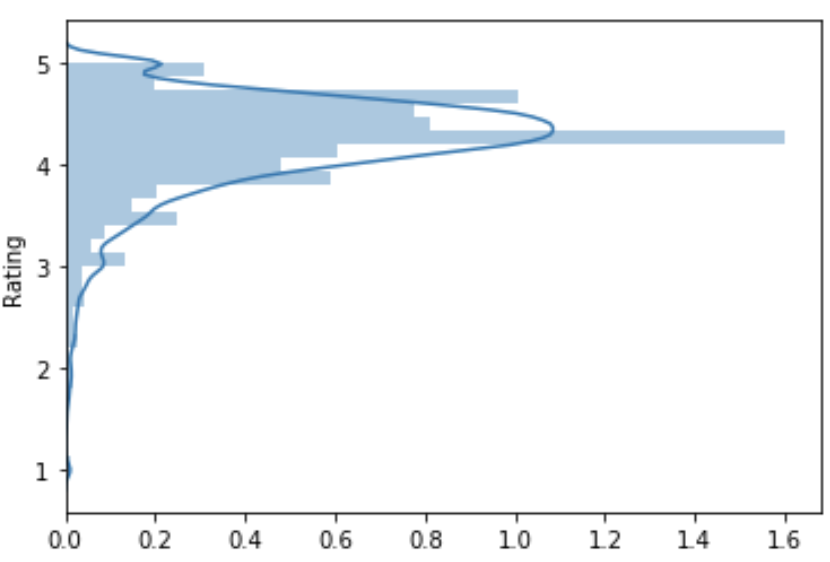

In [ ]:
# show image q3_plot.png
Image(filename='q3_plot.png')

<Axes: xlabel='Density', ylabel='Rating'>

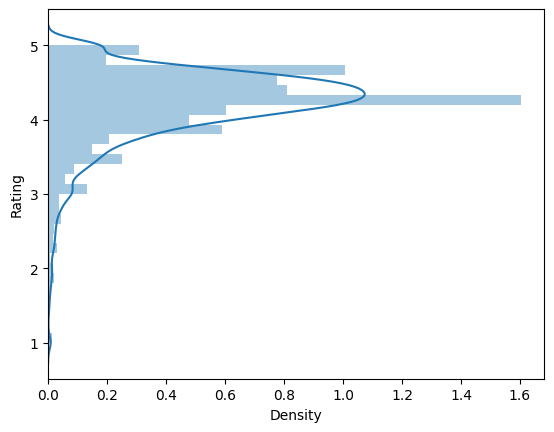

In [ ]:
sns.distplot(inp1.Rating, bins=30, vertical=True)
# we have to set vertical to True and bins to 30

Customizing a sns histogram plot

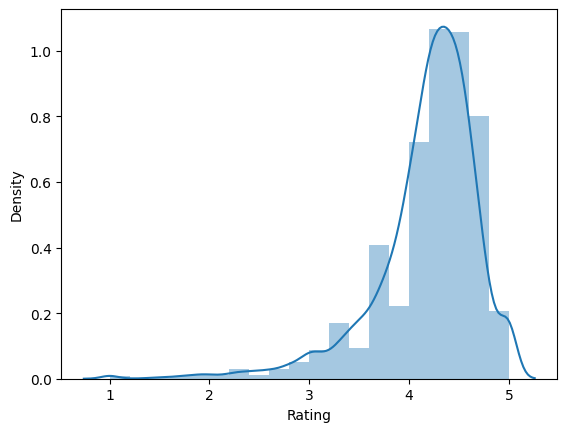

In [ ]:
#Change the number of bins to 20
sns.distplot(inp1.Rating, bins=20)
plt.show() # note that ratings like these are rare, usually its a u-shape
# here we have a lot of good ratings
# typically, this data is biased towards apps that have higher ratings
# this has to be accounted for when we analyze data
# avg wont be the most reliable measure since it will be too high

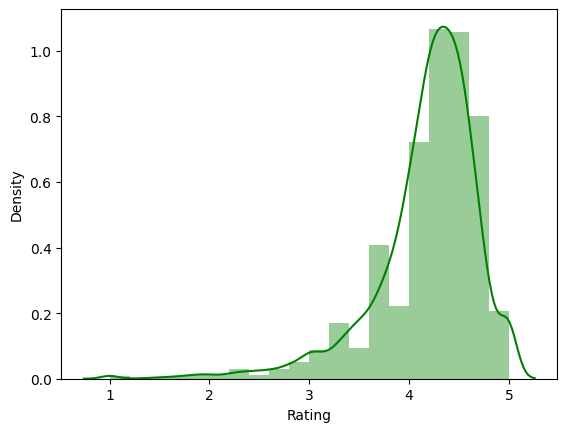

In [ ]:
#Change the colour of bins to green
sns.distplot(inp1.Rating, bins=20, color='g')
plt.show()

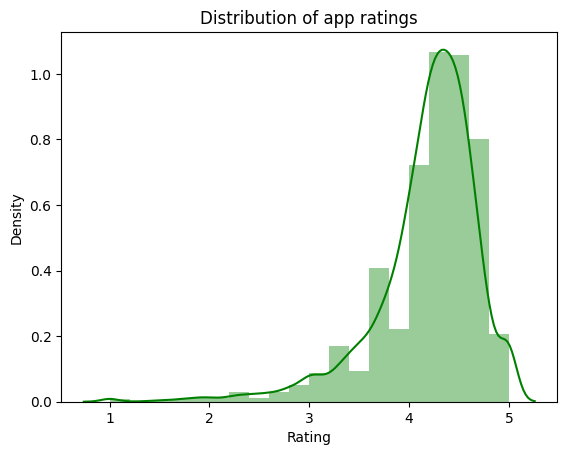

In [ ]:
#Apply matplotlib functionalities
#Change the colour of bins to green
sns.distplot(inp1.Rating, bins=20, color='g')
# add title with matplotlib
plt.title('Distribution of app ratings', fontsize=12)
plt.show()

So, after changing the number of bins to 20, you were able to observe that most of the ratings lie in the 4-5 range. This is quite a useful insight, which highlights the peculiarities of this domain. If people dislike an app, they don’t generally wait to give it bad ratings; rather, they go ahead and remove it immediately, without giving a review. Therefore, the average ratings of the apps are pretty high.

Additional Notes:

* “Probability Density” and “Probability Density Curve”:
    * Probability Density: This is a measure that describes how dense or concentrated the data is at different points within a distribution. Essentially, it tells you how likely you are to find data at any given point within the range.

    * Probability Density Curve: This is a smooth line that represents the probability density across different values. It helps visualize where the data is most concentrated and is often used to show the overall shape and spread of continuous data.

    * More info here: https://www.khanacademy.org/math/statistics-probability/random-variables-stats-library/random-variables-continuous/v/probability-density-functions
* Another chart analogous to the histogram is the countplot. It essentially plots the frequency of values for a categorical variable. Basically, the values are the same as when you take a value_counts() for that variable. Take a look at its documentation to understand how it is implemented: https://seaborn.pydata.org/generated/seaborn.countplot.html

#### **Styling Options**

One of the biggest advantages of using Seaborn is that you can retain its aesthetic properties and also the Matplotlib functionalities to perform additional customisations. Before we continue with our case study analysis, let’s study some styling options that are available in Seaborn.

-  Check out the official documentation:https://seaborn.pydata.org/generated/seaborn.set_style.html

In [ ]:
#Check all the styling options
?sns.set_style

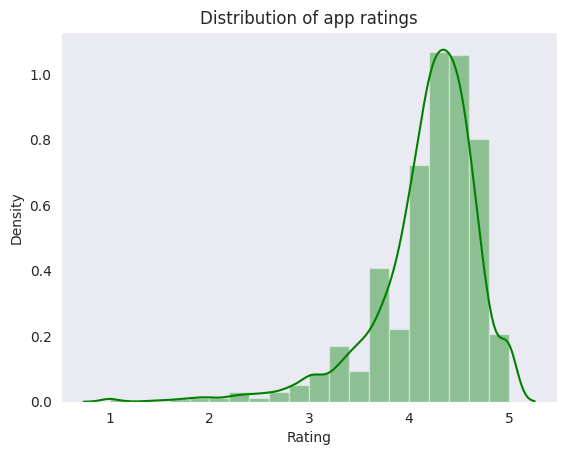

In [ ]:
sns.set_style('dark') # this sets background to dark
sns.distplot(inp1.Rating, bins=20, color='g')
plt.title('Distribution of app ratings', fontsize=12)
plt.show()

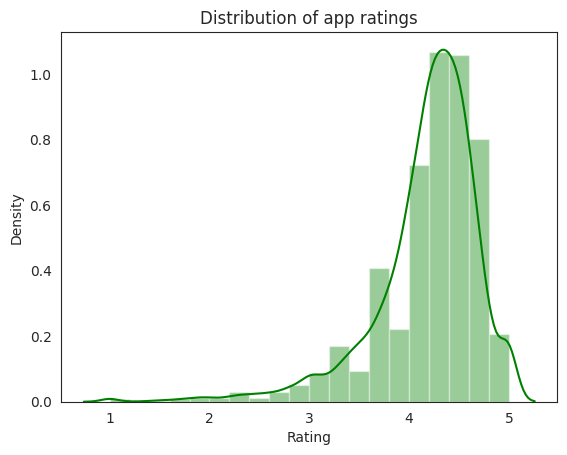

In [ ]:
sns.set_style('white') # this sets background to white
sns.distplot(inp1.Rating, bins=20, color='g')
plt.title('Distribution of app ratings', fontsize=12)
plt.show()

Matplotlib themes/styles

In [ ]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-v0_8',
 'seaborn-v0_8-bright',
 'seaborn-v0_8-colorblind',
 'seaborn-v0_8-dark',
 'seaborn-v0_8-dark-palette',
 'seaborn-v0_8-darkgrid',
 'seaborn-v0_8-deep',
 'seaborn-v0_8-muted',
 'seaborn-v0_8-notebook',
 'seaborn-v0_8-paper',
 'seaborn-v0_8-pastel',
 'seaborn-v0_8-poster',
 'seaborn-v0_8-talk',
 'seaborn-v0_8-ticks',
 'seaborn-v0_8-white',
 'seaborn-v0_8-whitegrid',
 'tableau-colorblind10']

In [ ]:
# apply 'tableau-colorblind10' style
plt.style.use('tableau-colorblind10')

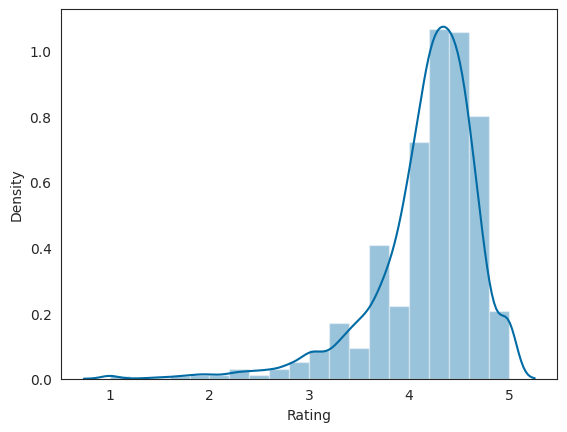

In [ ]:
sns.distplot(inp1.Rating, bins=20)
plt.show()

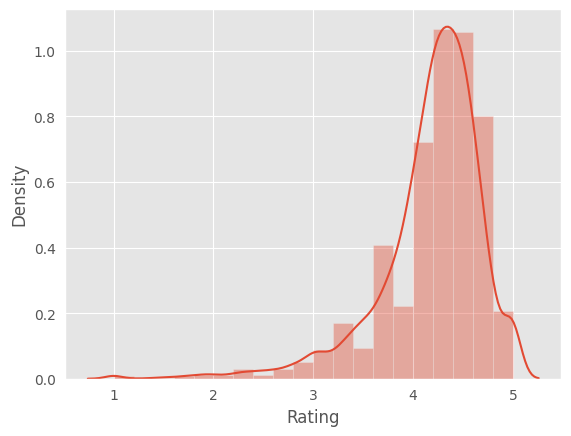

In [ ]:
# apply 'ggplot' style
plt.style.use('ggplot')
sns.distplot(inp1.Rating, bins=20)
plt.show()

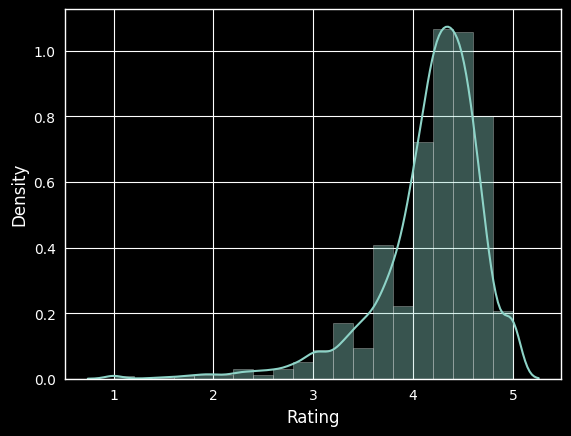

In [ ]:
# apply 'dark_background' style
plt.style.use('dark_background')
sns.distplot(inp1.Rating, bins=20)
plt.show()

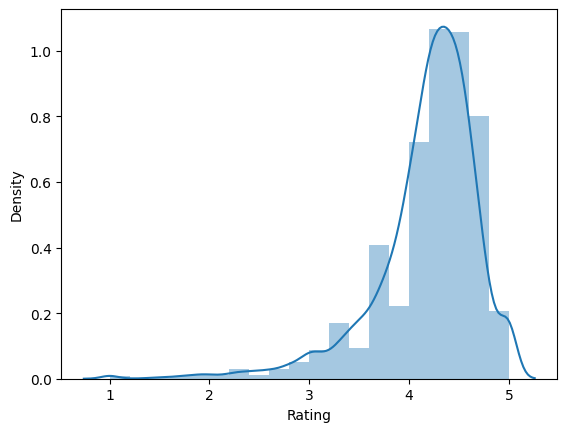

In [ ]:
# get default style back
plt.style.use('default')
%matplotlib inline
sns.distplot(inp1.Rating, bins=20)
plt.show()

See official documentation for seaborn.set_style:
https://seaborn.pydata.org/generated/seaborn.set_style.html

#### **Pie-Chart and Bar Chart**

In the earlier visualisations, you’re dealing only with numeric variables. Now you’ll step into analysing the categorical variables and see how the Ratings vary across each of them. Note that in the case of categorical variables, you need to use aggregates or measures like sum, average and median to plot the visualisations. And then use plots like a bar chart or pie chart to portray those relationships.

For analysing how a numeric variable changes across several categories of a categorical variable you utilise either a **pie chart or a box plot**

For example, if you want to visualise the responses of a marketing campaign, you can use the following views:

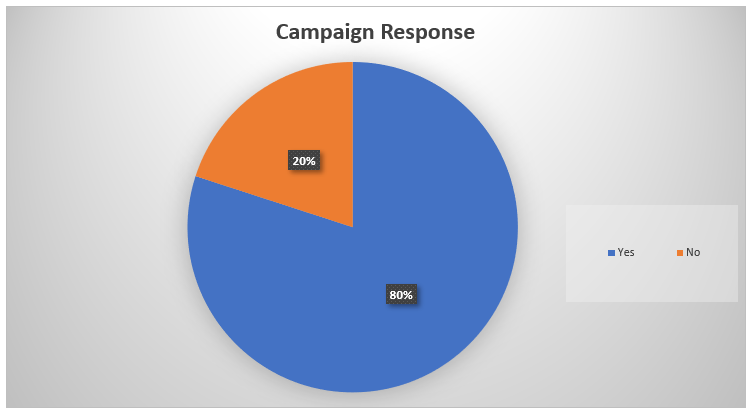

In [ ]:
# display imge pie.png
Image(filename='pie.png')

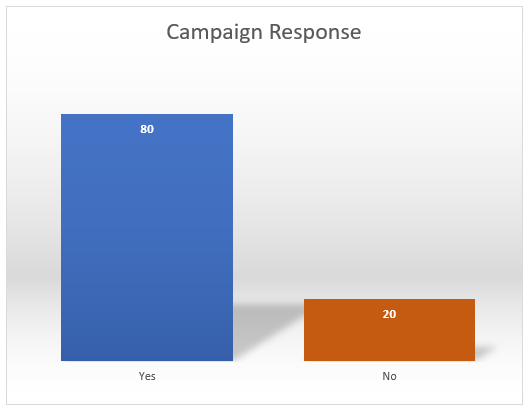

In [ ]:
# display image bar.png
Image(filename='bar.png')

- You'll be using the pandas method of plotting both a pie chart and a bar chart. Check out their official documentations:
   - https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.bar.html
   - https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.pie.html

In [ ]:
#Analyse the Content Rating column
inp1['Content Rating'].value_counts()

Content Rating
Everyone           6938
Teen                928
Mature 17+          417
Everyone 10+        337
Adults only 18+       3
Unrated               1
Name: count, dtype: int64

There are too few records about unrated and adults only to make a statement about these, so we should drop the records.

In [ ]:
#Remove the rows ("Adults only 18+" and "Unrated") with values which are less represented
inp1 = inp1[~inp1['Content Rating'].isin(['Adults only 18+', 'Unrated'])]
inp1.shape # as we can see we dropped a few rows

(8620, 13)

In [ ]:
#Reset the index so that the index is in continous values
inp1.reset_index(inplace=True, drop=True)
inp1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8620 entries, 0 to 8619
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             8620 non-null   object 
 1   Category        8620 non-null   object 
 2   Rating          8620 non-null   float64
 3   Reviews         8620 non-null   int32  
 4   Size            8620 non-null   float64
 5   Installs        8620 non-null   int64  
 6   Type            8620 non-null   object 
 7   Price           8620 non-null   float64
 8   Content Rating  8620 non-null   object 
 9   Genres          8620 non-null   object 
 10  Last Updated    8620 non-null   object 
 11  Current Ver     8620 non-null   object 
 12  Android Ver     8620 non-null   object 
dtypes: float64(3), int32(1), int64(1), object(8)
memory usage: 841.9+ KB


In [ ]:
#Check the apps belonging to different categories of Content Rating
inp1['Content Rating'].value_counts()

Content Rating
Everyone        6938
Teen             928
Mature 17+       417
Everyone 10+     337
Name: count, dtype: int64

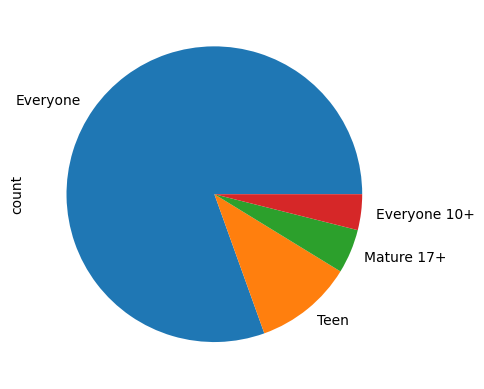

In [ ]:
#Plot a pie chart
inp1['Content Rating'].value_counts().plot.pie()
plt.show()

Shortcomings of pie plots (especially when there are 3+ categories plotted): It is very difficult to assess the difference between the different categories when their proportions are pretty similar as seen in the following pie chart:

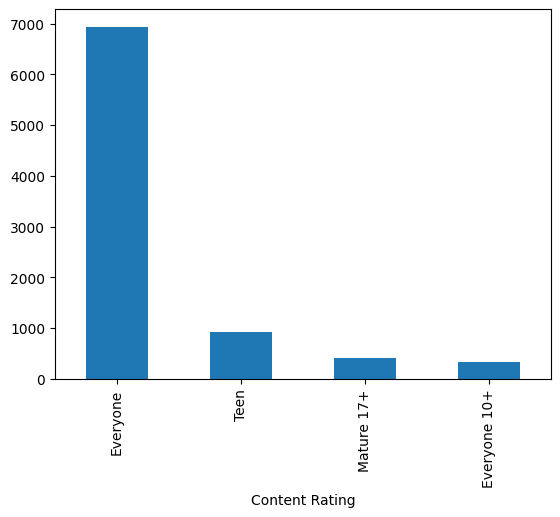

In [ ]:
#Plot a bar chart
inp1['Content Rating'].value_counts().plot.bar()
plt.show()

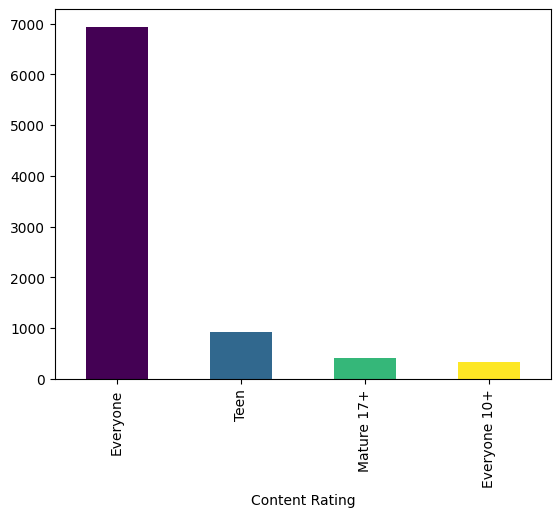

In [ ]:
# make barchart colorful
value_counts = inp1['Content Rating'].value_counts()

# Plotting the bar chart with a color map
colors = plt.cm.viridis(np.linspace(0, 1, len(value_counts)))  # Generates a list of colors
value_counts.plot.bar(color=colors)  # Apply the color list to the bar chart

plt.show()


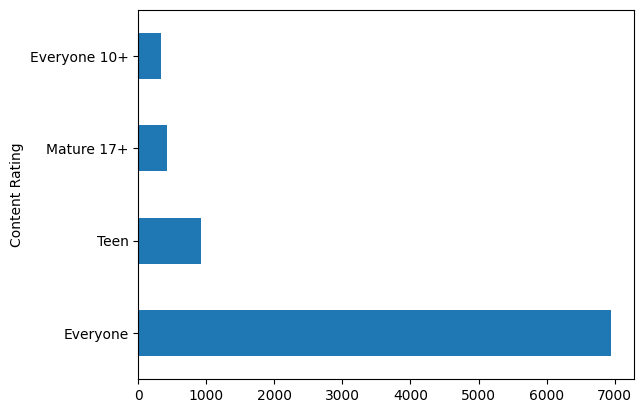

In [ ]:
inp1['Content Rating'].value_counts().plot.barh() # barh means horizonal bar chart
plt.show()

In [ ]:
#Question - Plot a bar plot for checking the 4th highest Android version type
inp1['Android Ver'].value_counts() # Varies with device

Android Ver
4.1 and up            1880
4.0.3 and up          1169
4.0 and up            1065
Varies with device    1018
4.4 and up             833
2.3 and up             559
5.0 and up             527
4.2 and up             320
2.3.3 and up           232
2.2 and up             208
3.0 and up             205
4.3 and up             192
2.1 and up             110
1.6 and up              86
6.0 and up              48
7.0 and up              40
3.2 and up              31
2.0 and up              27
5.1 and up              18
1.5 and up              16
3.1 and up               7
4.4W and up              6
2.0.1 and up             6
8.0 and up               5
7.1 and up               3
4.0.3 - 7.1.1            2
5.0 - 8.0                2
1.0 and up               2
7.0 - 7.1.1              1
4.1 - 7.1.1              1
5.0 - 6.0                1
Name: count, dtype: int64

#### **Scatter Plots**

Previously, you had dealt with only a single numeric column and therefore used either a box-plot or a histogram to portray the insights visually. What about two numeric columns? We now want to find out the **relationship between Rating and Size** (both numeric). If you want to plot **the relationship between two numeric variables**, you will be using something known as a scatter plot.

Scatterplots are perhaps one of the most commonly used as well one of the most powerful visualisations you can use in the field of machine learning. They are pretty crucial in revealing relationships between the data points and you can generally deduce some sort of trends in the data with the help of a scatter plot.

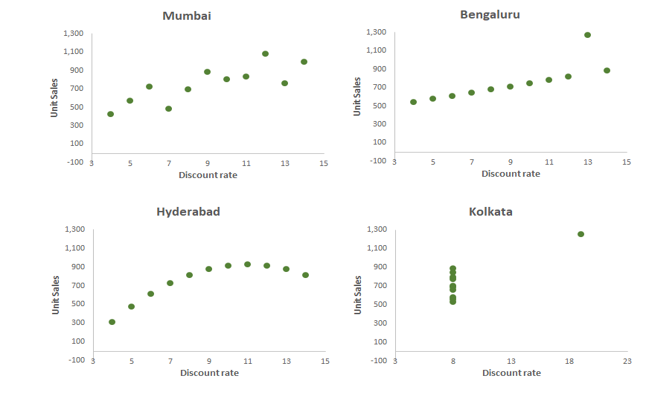

In [ ]:
# display image scatter.png
Image(filename='scatter.png')

- They're pretty useful in regression problems to check whether a linear trend exists in the data or not. For example, in the image below, creating a linear model in the first case makes far more sense since a clear straight line trend is visible.

Applications of scatter plots in machine learning
* Observing trends between numeric variables: Because scatter plots can reveal patterns in the data, they’re a necessity in linear regression problems where you want to determine whether making a linear model, i.e. using a straight line to predict something makes sense or not. Check out the diagram given below.
* Making a linear model between x and y makes complete sense in the first case rather than the second one.
* Observing natural clusters in the data: In simple terms, clustering is the act of grouping similar entities to clusters. For example, let’s say you have a group of students who have recently taken a test in Maths and Biology. Plotting a scatter plot of their marks in the two subjects reveals the following view: see 2 graphic below.

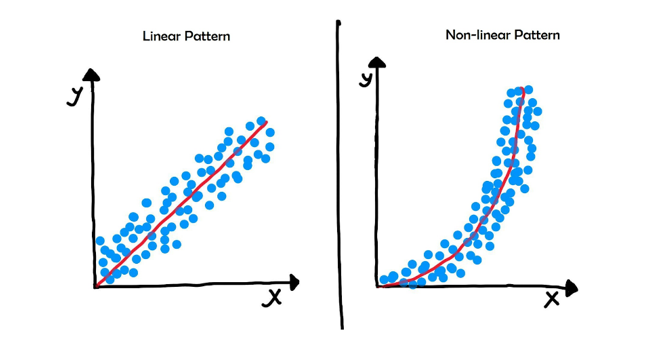

In [ ]:
Image(filename='regression3.PNG')

- Also, they help in observing __naturally occuring clusters__. In the following image, the marks of students in Maths and Biology has been plotted.You can clearly group the students to 4 clusters now. Cluster 1 are students who score very well in Biology but very poorly in Maths, Cluster 2 are students who score equally well in both the subjects and so on.

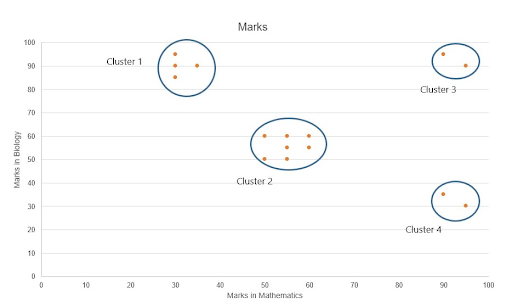

In [ ]:
# display image Clusters.png
Image(filename='Clusters.png')

**Note**: You'll be studying about both Regression and Clustering in greater detail in the machine learning modules

You'll be using **sns.jointplot()** for creating a scatter plot. Check out its documentation:
https://seaborn.pydata.org/generated/seaborn.jointplot.html

Plotting the scatter plot between Rating and Size

You already know how to do this in matplotlib using pyplot.scatter() function. In seaborn, we have the sns.scatterplot() [link text](https://seaborn.pydata.org/generated/seaborn.scatterplot.html) which is pretty intuitive and similar to its matplotlib counterpart. You are advised to go through its [official documentation](https://seaborn.pydata.org/generated/seaborn.scatterplot.html) to get an understanding of how the various parameters work.

However, in this case, you’ll be using something called a **JointPlot** which combines the functionality of a scatter plot and also adds additional statistical information to it

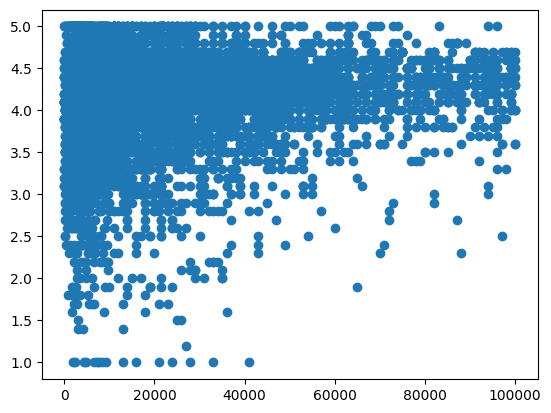

In [ ]:
### Scatterplot - Size vs Rating
##Plot a scatter-plot in the matplotlib way between Size and Rating
plt.scatter(inp1.Size, inp1.Rating)
plt.show()

In [ ]:
# set style
sns.set_style('white')

In [ ]:
# help sns.joinplot
?sns.jointplot

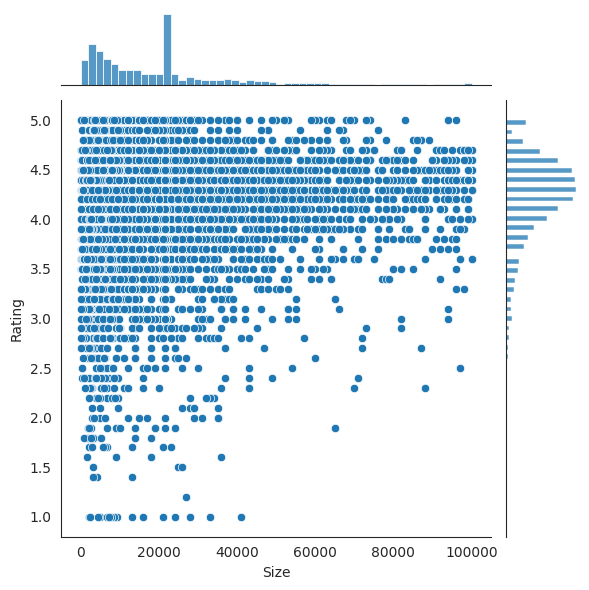

In [ ]:
### Plot the same thing now using a jointplot
sns.jointplot(data=inp1, x='Size', y='Rating')
plt.show()

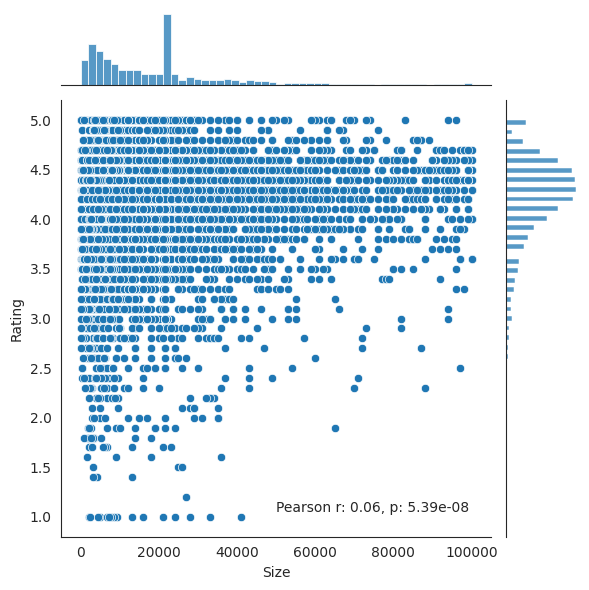

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

# Create a jointplot
g = sns.jointplot(data=inp1, x='Size', y='Rating', kind='scatter')

# Calculate the Pearson correlation coefficient and p-value
corr, p_value = pearsonr(inp1['Size'].dropna(), inp1['Rating'].dropna())

# Annotate the plot with the Pearson correlation coefficient and p-value, positioned at bottom right
plt.text(0.95, 0.05, f'Pearson r: {corr:.2f}, p: {p_value:.3g}',
         transform=g.ax_joint.transAxes,
         horizontalalignment='right',  # Right align the text
         verticalalignment='bottom',  # Align text to the bottom
         fontsize=10)                 # Adjust font size as needed

plt.show()


What we can see from the above scatterplot, the heavier the app, the higher the chances that it will be rated higher. There is a very weak trend between size and ratings, i.e. I cannot strongly say that higher size means better ratings.

In addition to the normal scatter plot, the jointplot also adds the histogram of the respective columns to the mix as well. In this way, you can get an idea of the spread of the variables being discussed and therefore, make more succinct conclusions and gather insights from the data.

See searborn.jointplot documentation: https://seaborn.pydata.org/generated/seaborn.jointplot.html

Question: Jointplot

In case you want to remove the histogram/distribution plot appearing on the jointplot’s axes, the command that you need to use is?

Solution: None of the above.

Feedback:
You cannot remove the distribution plot from the Jointplot. In case you don’t want it, you can always use pyplot.scatter() or sns.scatterplot() to plot the same variables.

**Reg Plots**

- These are an extension to the jointplots, where a regression line is added to the view

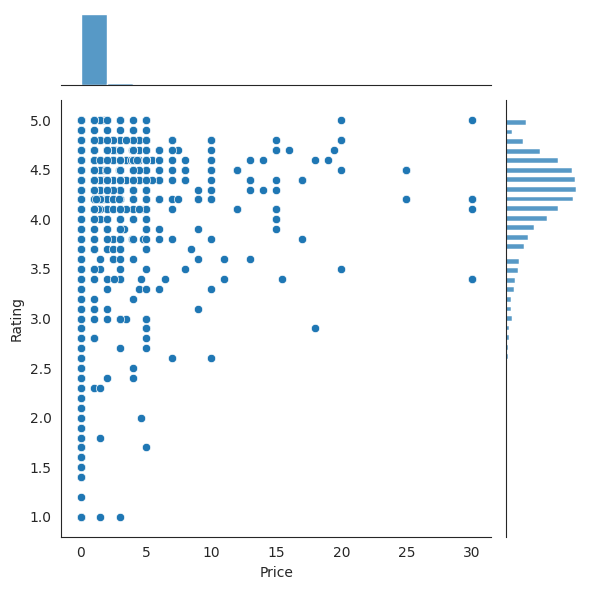

In [ ]:
# Rating vs. Price
sns.jointplot(data=inp1, x='Price', y='Rating')
plt.show()

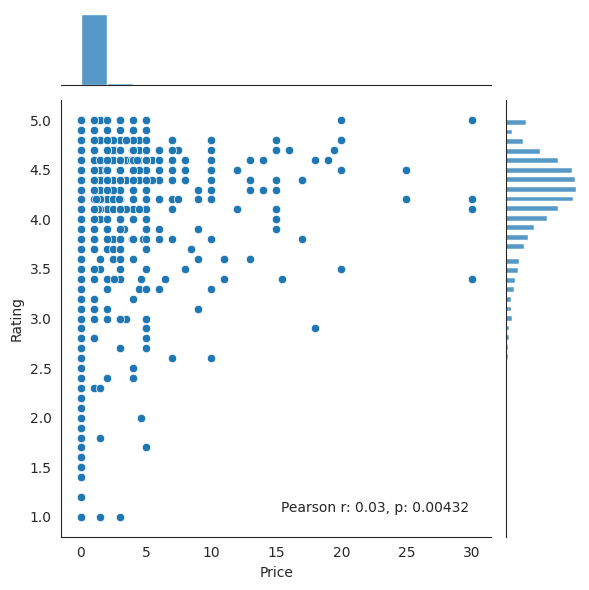

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

# Create a jointplot
g = sns.jointplot(data=inp1, x='Price', y='Rating', kind='scatter')

# Make sure to handle missing values properly
# Calculate the Pearson correlation coefficient and p-value
corr, p_value = pearsonr(inp1['Price'].dropna(), inp1['Rating'].dropna())

# Annotate the plot with the Pearson correlation coefficient and p-value, positioned at bottom right
# Ensure text is clearly readable and properly positioned
plt.text(0.95, 0.05, f'Pearson r: {corr:.2f}, p: {p_value:.3g}',
         transform=g.ax_joint.transAxes,
         horizontalalignment='right',  # Right align the text
         verticalalignment='bottom',  # Align text to the bottom
         fontsize=10)                 # Adjust font size as needed

plt.show()

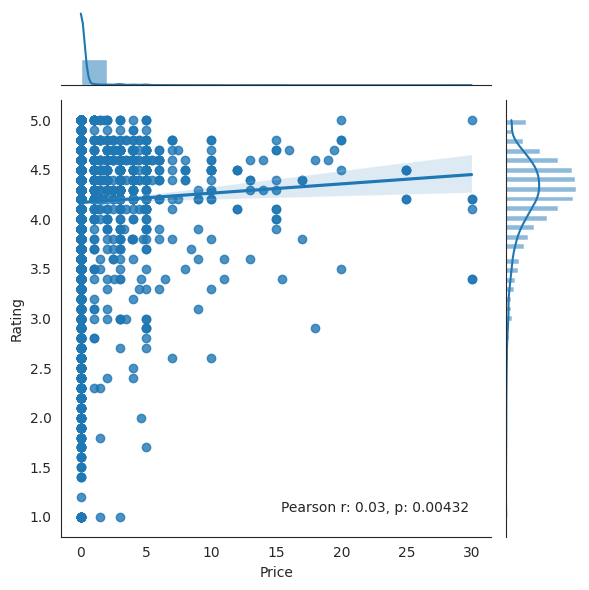

In [ ]:
##Plot a reg plot for Price and Rating and observe the trend
g = sns.jointplot(data=inp1, x='Price', y='Rating', kind='reg')

# Make sure to handle missing values properly
# Calculate the Pearson correlation coefficient and p-value
corr, p_value = pearsonr(inp1['Price'].dropna(), inp1['Rating'].dropna())

# Annotate the plot with the Pearson correlation coefficient and p-value, positioned at bottom right
# Ensure text is clearly readable and properly positioned
plt.text(0.95, 0.05, f'Pearson r: {corr:.2f}, p: {p_value:.3g}',
         transform=g.ax_joint.transAxes,
         horizontalalignment='right',  # Right align the text
         verticalalignment='bottom',  # Align text to the bottom
         fontsize=10)                 # Adjust font size as needed

plt.show()

As we can see, the line is going up, so we can expect apps with higher prices to have better ratings

In [ ]:
inp1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8620 entries, 0 to 8619
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             8620 non-null   object 
 1   Category        8620 non-null   object 
 2   Rating          8620 non-null   float64
 3   Reviews         8620 non-null   int32  
 4   Size            8620 non-null   float64
 5   Installs        8620 non-null   int64  
 6   Type            8620 non-null   object 
 7   Price           8620 non-null   float64
 8   Content Rating  8620 non-null   object 
 9   Genres          8620 non-null   object 
 10  Last Updated    8620 non-null   object 
 11  Current Ver     8620 non-null   object 
 12  Android Ver     8620 non-null   object 
dtypes: float64(3), int32(1), int64(1), object(8)
memory usage: 841.9+ KB


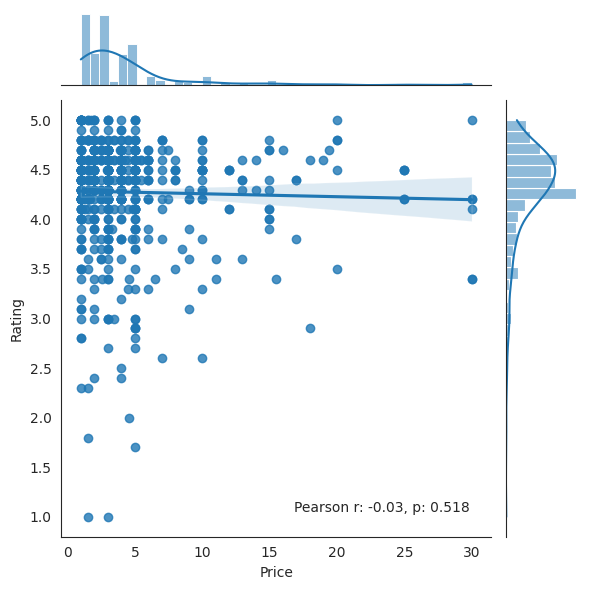

In [ ]:
## Question - Plot a reg plot for Price and Rating again for only the paid apps.
import seaborn as sns
import matplotlib.pyplot as plt

# Filter the dataset to include only paid apps
paid_apps = inp1[inp1['Price'] > 0]

# Create a jointplot with regression line for Price and Rating of paid apps
g = sns.jointplot(data=paid_apps, x='Price', y='Rating', kind='reg')

# Calculate the Pearson correlation coefficient and p-value for paid apps
corr, p_value = pearsonr(paid_apps['Price'].dropna(), paid_apps['Rating'].dropna())

# Annotate the plot with the Pearson correlation coefficient and p-value, positioned at bottom right
plt.text(0.95, 0.05, f'Pearson r: {corr:.2f}, p: {p_value:.3g}',
         transform=g.ax_joint.transAxes,
         horizontalalignment='right',  # Right align the text
         verticalalignment='bottom',  # Align text to the bottom
         fontsize=10)                 # Adjust font size as needed

plt.show()


As you can see, when u seperate the paid ones, there is a downwards, trend, indicating that cheaper ones (but not free ones) have higher reviews

Additional Notes

* In case you’re curious, Pearson’s r value is a metric to measure the correlation between 2 numerical entities. You can read more about it in the following [link](https://en.wikipedia.org/wiki/Pearson_correlation_coefficient).
* Scatter plots can show the trends for only 2 numeric variables. For understanding the relationships between 3 or more, you need to use other visualisations.

**Pair Plots**

Now, in case there are 4-5 numeric variables that you want to analyse, making a jointplot for every 2 numeric variables is a bit tedious. To overcome this limitation, let’s learn another functionality, the pair plots.

 - When you have several numeric variables, making multiple scatter plots becomes rather tedious. Therefore, a pair plot visualisation is preferred where all the scatter plots are in a single view in the form of a matrix
 - For the non-diagonal views, it plots a **scatter plot** between 2 numeric variables
 - For the diagonal views, it plots a **histogram**

Pair Plots help in identifying the trends between a target variable and the predictor variables pretty quickly. For example, say you want to predict how your company’s profits are affected by three different factors. In order to choose which you created a pair plot containing profits and the three different factors as the variables. Here are the scatterplots of profits vs the three variables that you obtained from the pair plot.

It is clearly visible that the left-most factor is the most prominently related to the profits, given how linearly scattered the points are and how randomly scattered the rest two factors are.

You'll be using **sns.pairplot()** for this visualisation. Check out its official documentation:https://seaborn.pydata.org/generated/seaborn.pairplot.html

Look at all numeric columns together - pair plot

In [ ]:
?sns.pairplot

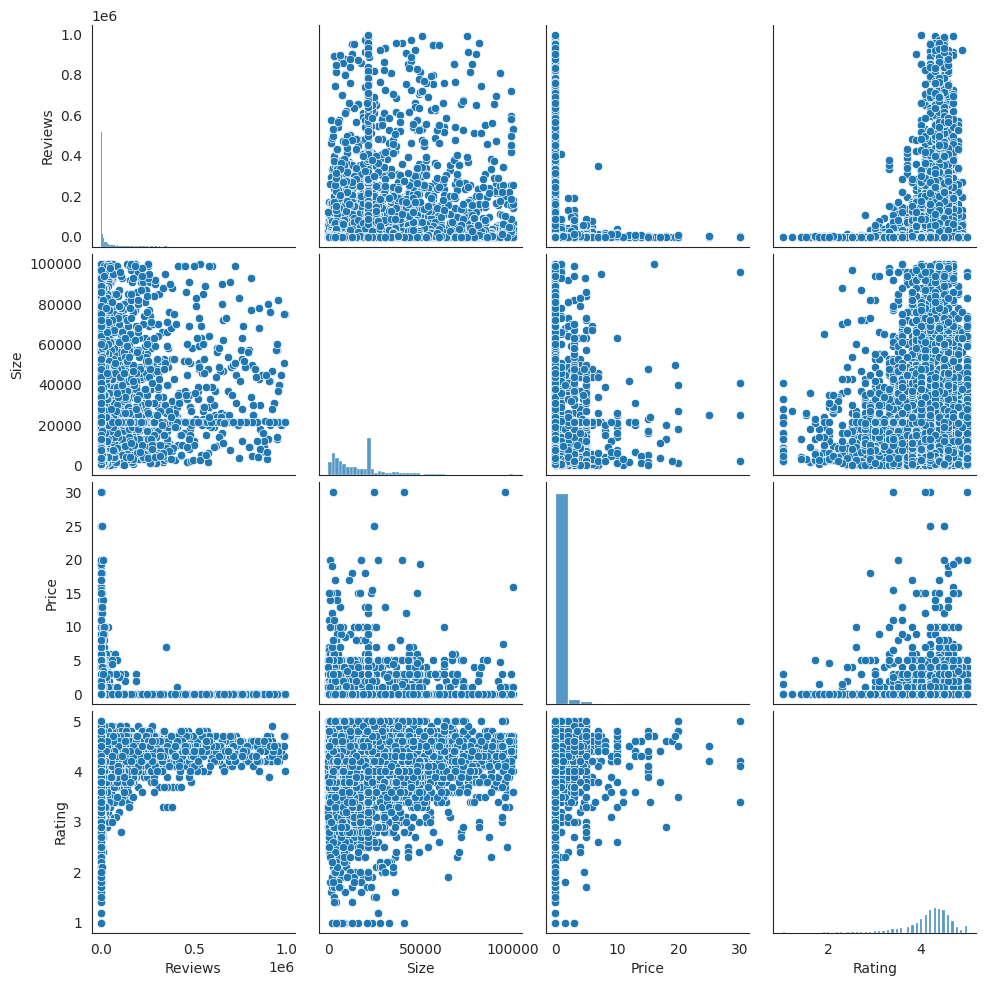

In [ ]:
## Create a pair plot for Reviews, Size, Price and Rating
sns.pairplot(inp1[[ 'Reviews', 'Size', 'Price', 'Rating']])
plt.show()

As you can see for every two numeric variables, the pairplot creates a scatter-plot whereas in the case for the diagonal ones, where the same variable is being considered twice, a histogram is shown.

Here, you’re able to make certain inferences in conjunction with the ones made in earlier segments, like how Reviews and Price have an inverse relationship as the L-shaped scatter plot represents. Now, compared to the previous jointplot, you observe that the statistical information is a bit less( no Pearson coefficient to explain the correlation between the 2 variables) but nevertheless having a bird’s eye view of all the numeric variables at once has its own advantages.

Application in Machine Learning

* Pairplots instantly give you the relationship between one numeric variable with the rest of the numeric variables. This is pretty useful in identifying relationships between the target variable and the rest of the features.
* For example, say you want to predict how your company’s sales are affected by budgets allocated to three different types of advertisement channels - TV, Newspaper and Radio. In order to choose, you need to create a pair plot containing profits and the three different budgets as the variables. Let's say the scatterplots of profits vs the three variables that you obtained from the pair plot are as follows (Click on the image to magnify it):

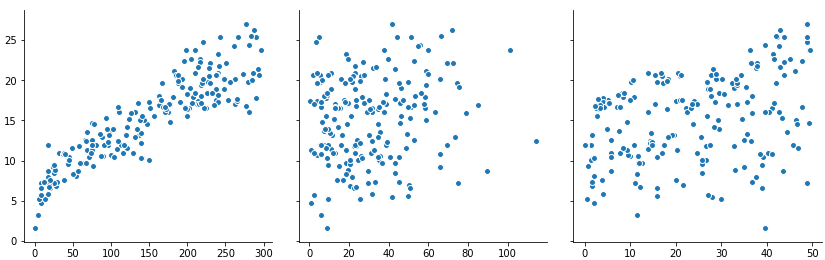

In [ ]:
# display image pairplots2.png
Image(filename='pairplots2.png')

It is clearly visible that the left-most factor or budget allocated to TV is the most prominently related to the company's Sales since you can clearly ascertain a trend between them - increase in budgets for TV ads leads to more sales, whereas the points are scattered quite randomly in the latter two cases.

**Revisiting Bar Graphs and Box Plots**

**Bar Charts Revisited**

- Here, you'll be using bar charts once again, this time using the **sns.barplot()** function. Check out its official documentation:https://seaborn.pydata.org/generated/seaborn.barplot.html
- You can modify the **estimator** parameter to change the aggregation value of your barplot

Content Rating vs. Rating

In [ ]:
##Plot a bar plot of Content Rating vs Average Rating
# for each category, look at some aggregates, e.g. does this category have higher avg etc

# lets get avg rating for each category
inp1.groupby(['Content Rating'])['Rating'].mean()
# groupby(['Content Rating']): This function groups the data in the DataFrame inp1 based on unique values in the 'Content Rating' column. Essentially, it creates a separate group for each unique content rating (like "Everyone", "Teen", "Mature 17+", etc.).
#['Rating']: This part specifies that from each group created by the groupby function, we are only interested in the 'Rating' column. So after grouping the data by 'Content Rating', it selects the 'Rating' column for the next operation.
#mean(): This function calculates the average (mean) of the 'Rating' values for each group. I

Content Rating
Everyone        4.171087
Everyone 10+    4.217211
Mature 17+      4.099760
Teen            4.200647
Name: Rating, dtype: float64

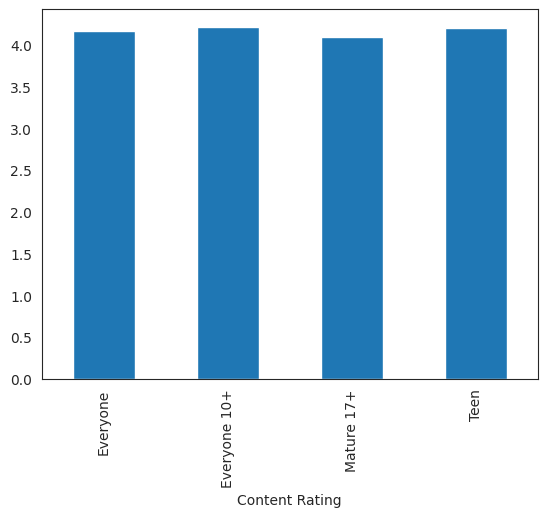

In [ ]:
##Plot a bar plot of Content Rating vs Average Rating
inp1.groupby(['Content Rating'])['Rating'].mean().plot.bar()
plt.show()

Median will give us a more accurate picture

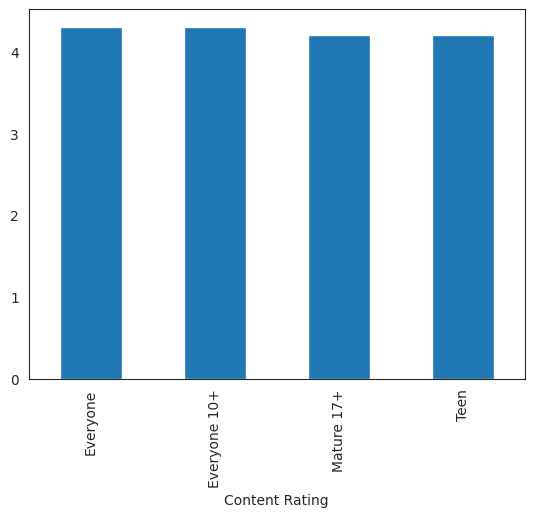

In [ ]:
##Plot the bar plot again with Median Rating
inp1.groupby(['Content Rating'])['Rating'].median().plot.bar()
plt.show()

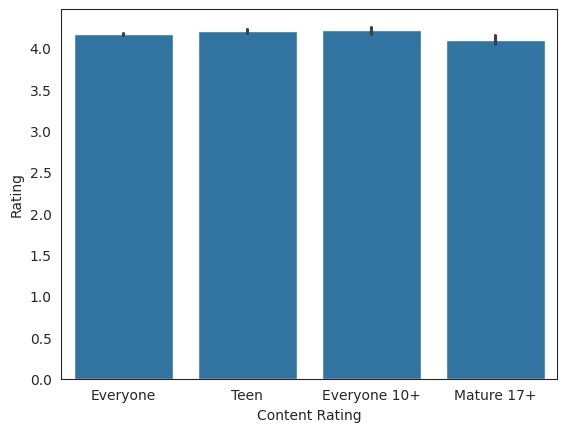

In [ ]:
sns.barplot(data=inp1, x='Content Rating', y='Rating')
plt.show()

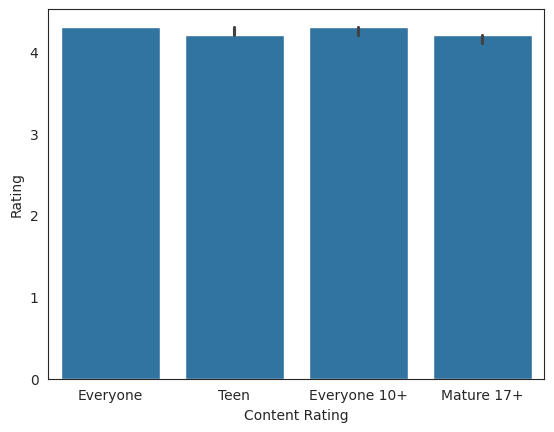

In [ ]:
##Plot the above bar plot using the estimator parameter
sns.barplot(data=inp1, x='Content Rating', y='Rating', estimator=np.median)
plt.show()

lets look at the lower positions

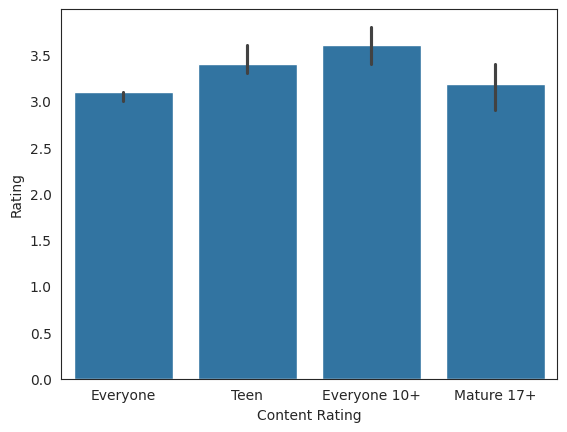

In [ ]:
##Plot the bar plot with only the 5th percentile of Ratings
sns.barplot(data=inp1, x='Content Rating', y='Rating', estimator=lambda x: np.quantile(x,0.05))
plt.show()

Since taking just the average did not give us any insight, we decided to use the median metric. Here, you observed that the median value also did not prove to be a good differentiator for the categories being analysed.

Now, this is where you utilised Seaborn’s estimator function to create bar graphs for different metrics (other than the median and mean) as you did earlier. In this case, you used the value at the 5th percentile to compare the categories and utilised the following estimator function for it:

```
estimator=lambda x: np.quantile(x,0.05)
```

Here, you can see some clear differences popping up: “Everyone 10+” has the highest rating at the 5th percentile (3.5), followed by “Teen” (around 3.3) and then “Everyone” & “Mature 17+”(around 3).

Using the estimator function, you can observe the values at different percentiles and compare the different categories.



Question: Estimator

Change the estimator function in the graph above to analyse minimum Rating for each of the different categories of ‘Content Rating’. Which category has the highest minimum rating?

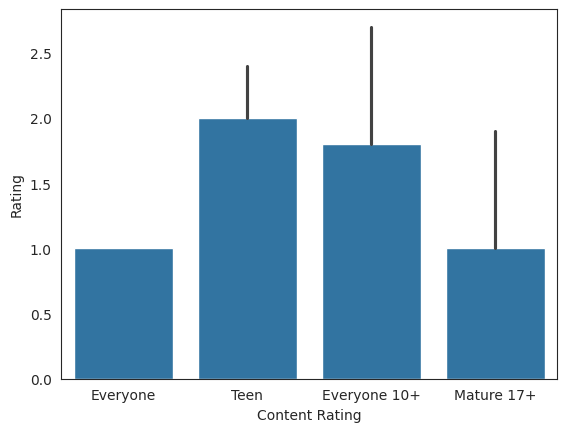

In [ ]:
##Question - Plot the bar plot with the minimum Rating
sns.barplot(data=inp1, x='Content Rating', y='Rating', estimator=np.min)
plt.show()

Question 2: Capping
Plot a boxplot for the Rating column. The lower fence gets capped between

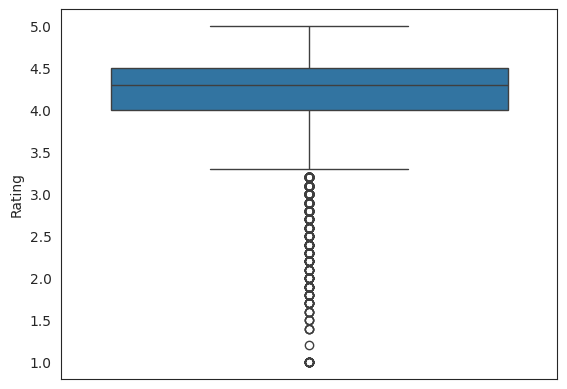

In [ ]:
# Plot a boxplot for the Rating column. The lower fence gets capped between
sns.boxplot(inp1.Rating)
plt.show() # as u can see, 3.0-3.5 is the solution

Question: Lower fence

For the 4 most popular Genres, plot a box plot and report back the Genre having the highest Rating at the lower fence.
[Hint: For finding the top 4 most popular Genres, you may use the value_counts() function. After that subset the dataframe to only contain the data for these specific Genre types]

In [ ]:
# For the 4 most popular Genres, plot a box plot and report back the Genre having the highest Rating at the lower fence.
# Hint: For finding the top 4 most popular Genres, you may use the value_counts() function. After that subset the dataframe to only contain the data for these specific Genre types
inp1['Genres'].value_counts()

Genres
Tools                     694
Entertainment             508
Education                 464
Medical                   344
Finance                   315
                         ... 
Arcade;Pretend Play         1
Card;Brain Games            1
Lifestyle;Pretend Play      1
Comics;Creativity           1
Strategy;Creativity         1
Name: count, Length: 115, dtype: int64

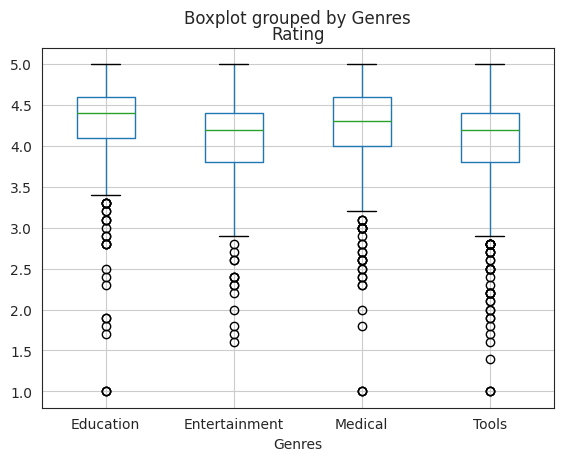

In [ ]:
# Plot box plot for 4 most popular Genres (Tools, Entertainment, Education, Medical)
inp1[inp1['Genres'].isin(['Tools', 'Entertainment', 'Education', 'Medical'])].boxplot(column='Rating', by='Genres')
plt.show()

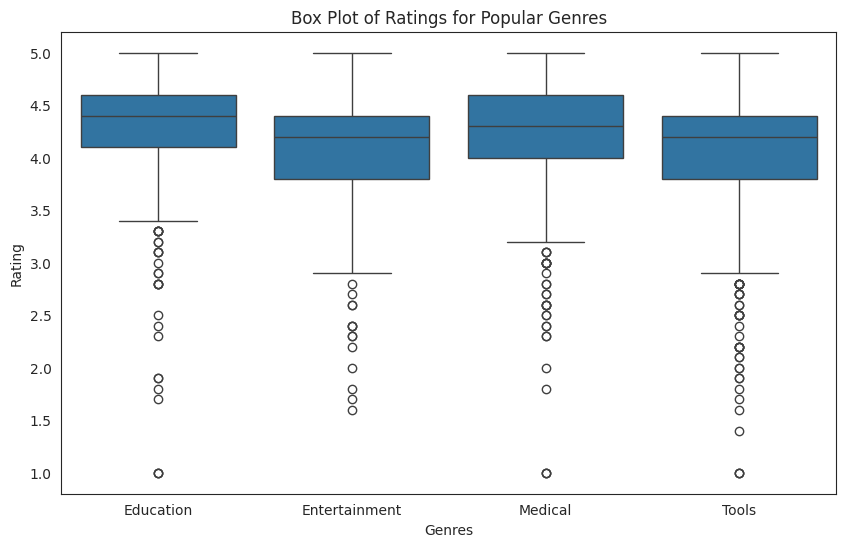

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filter the dataset for only the specified genres
popular_genres = inp1[inp1['Genres'].isin(['Tools', 'Entertainment', 'Education', 'Medical'])]

# Create a box plot for these genres
plt.figure(figsize=(10, 6))  # Set the figure size for better visibility
sns.boxplot(data=popular_genres, x='Genres', y='Rating')

# Set title and labels for clarity
plt.title('Box Plot of Ratings for Popular Genres')
plt.xlabel('Genres')
plt.ylabel('Rating')

# Display the plot
plt.show()


Now, you must be wondering, rather than observing at specific percentiles, why not visualise the entire spread of ratings for each category using a box plot? Well, if you did , then good job! You’re thinking in the right direction.

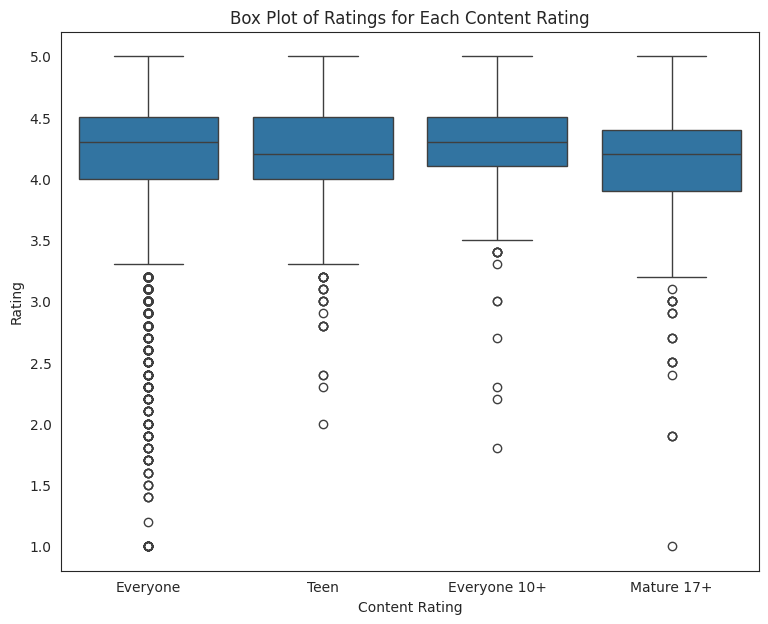

In [302]:
# box plot rating for each content rating

# Create the box plot, making sure to pass column names as keyword arguments
plt.figure(figsize=[9, 7])
sns.boxplot(data=inp1, x='Content Rating', y='Rating')

# Add labels and title for clarity
plt.title('Box Plot of Ratings for Each Content Rating')
plt.xlabel('Content Rating')
plt.ylabel('Rating')

# Display the plot
plt.show()

Here, you get a bird’s eye view of the spread of ratings for the different categories: median, 75th percentiles, fences, etc. The immediate insight that you obtained from the above view are:

* That “Everyone” category has the highest number of ratings in the lower percentiles as compared to the other categories.
* The median values are all comparable, which was discovered in the previous views as well.
* The upper fences for all the categories get capped at 5.0, whereas there are some observable differences in the lower fences.

Comparing Box Plots



As you saw in the above visualisation, comparing box plots of a particular measure for different categories helps you analyse the consistency and difference in spread between all the given variables. The IQR or the inter-quartile range serves a very useful purpose here in doing the same. [Here's a video](https://www.youtube.com/watch?v=eUkgf-2NVO8) that explains how to compare different box plots to determine the most consistent performance.

Additional Notes

* In the first use case of box plots, you observed how they can be used to identify and remove outliers from the data. In this segment, you understood how box plots can enable you to analyse a numerical variable across several categories. These two are the most prominent use cases of box plots that you’ll be encountering from time to time as you proceed in this program.
* As you saw in the video, utilising the groupby function, the bar graph can be used to compare the mean, median, sum and several other metrics.

__**Box Plots Revisited**__

- Apart from outlier analysis, box plots are great at comparing the spread and analysing a numerical variable across several categories
- Here you'll be using **sns.boxplot()** function to plot the visualisation. Check out its documentation: https://seaborn.pydata.org/generated/seaborn.boxplot.html




#### **Heat Maps**

Heat maps utilise the concept of using colours and colour intensities to visualise a range of values. You must have seen heat maps in cricket or football broadcasts on television to denote the players’ areas of strength and weakness.

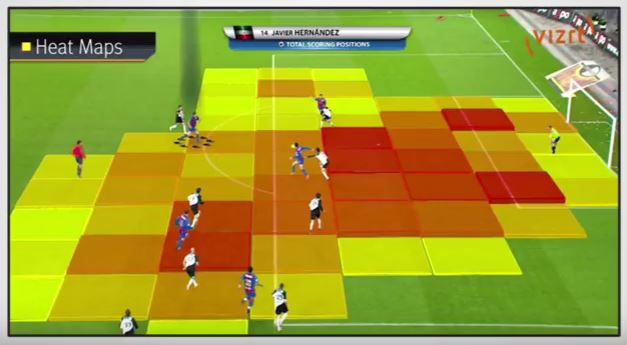

In [303]:
# display image heatmap1.png
Image(filename='heatmap1.png')

- In python, you can create a heat map whenever you have a rectangular grid or table of numbers analysing any two features

* Preferred for visualising numeric values in a grid or a matrix
* We want to check how Size & Reviews interact with respect to Ratings
* Create buckets of Size & Reviews
* One would represent the row and another would represent the columns
* Each cell would represent the rating corresponding to that bucket
* To visualise this matrix, each cell would have a different colour share depending on the rating

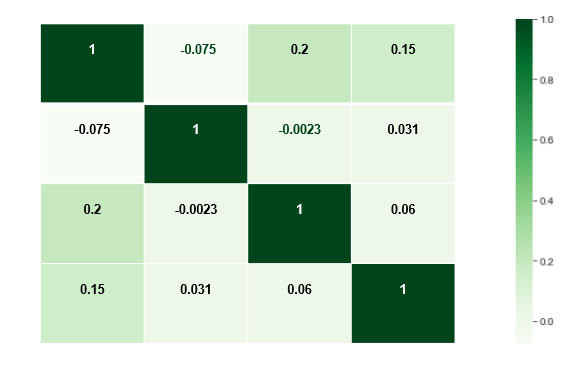

In [305]:
# display image heatmap2.png
Image(filename='heatmap2.PNG')

- You'll be using **sns.heatmap()** to plot the visualisation. Checkout its official documentation :https://seaborn.pydata.org/generated/seaborn.heatmap.html

Heat map for Ratings/Size/Content Rating

In [308]:
?pd.qcut # bins numeric data into equal-sized buckets based on quantiles

In [310]:
##Ratings vs Size vs Content Rating
inp1['Size_Bucket'] = pd.qcut(inp1.Size, [0, 0.2, 0.4, 0.6, 0.8, 1], ["VL", "L", "M", "H", "VH"])
# divides the 'Size' column of the inp1 DataFrame into five categories based on the distribution of 'Size' data

##Prepare buckets for the Size column using pd.qcut



In [311]:
inp1.head()

App        Category  Rating  \
0     Photo Editor & Candy Camera & Grid & ScrapBook  ART_AND_DESIGN     4.1   
1                                Coloring book moana  ART_AND_DESIGN     3.9   
2  U Launcher Lite – FREE Live Cool Themes, Hide ...  ART_AND_DESIGN     4.7   
3                              Sketch - Draw & Paint  ART_AND_DESIGN     4.5   
4              Pixel Draw - Number Art Coloring Book  ART_AND_DESIGN     4.3   

   Reviews     Size  Installs  Type  Price Content Rating  \
0      159  19000.0     10000  Free    0.0       Everyone   
1      967  14000.0    500000  Free    0.0       Everyone   
2    87510   8700.0   5000000  Free    0.0       Everyone   
3   215644  25000.0  50000000  Free    0.0           Teen   
4      967   2800.0    100000  Free    0.0       Everyone   

                      Genres      Last Updated         Current Ver  \
0               Art & Design   January 7, 2018               1.0.0   
1  Art & Design;Pretend Play  January 15, 2018               2.0.0   
2               Art & Design    August 1, 2018               1.2.4   
3               Art & Design      June 8, 2018  Varies with device   
4    Art & Design;Creativity     June 20, 2018                 1.1   

    Android Ver Size_Bucket  
0  4.0.3 and up           M  
1  4.0.3 and up           M  
2  4.0.3 and up           L  
3    4.2 and up           H  
4    4.4 and up          VL

In [312]:
?pd.pivot_table

In [314]:
##Create a pivot table for Size_buckets and Content Rating with values set to Rating
pd.pivot_table(data=inp1, index='Content Rating', columns='Size_Bucket', values='Rating')

Size_Bucket           VL         L         M         H        VH
Content Rating                                                  
Everyone        4.117536  4.158405  4.215784  4.170799  4.187302
Everyone 10+    4.189474  4.207407  4.238318  4.193443  4.217073
Mature 17+      3.978947  4.124211  4.021705  4.155172  4.193814
Teen            4.184848  4.233094  4.143310  4.198131  4.246154

In [315]:
##Change the aggregation to median
pd.pivot_table(data=inp1, index='Content Rating', columns='Size_Bucket', values='Rating', aggfunc=np.median)

Size_Bucket       VL    L    M    H   VH
Content Rating                          
Everyone        4.20  4.3  4.3  4.3  4.3
Everyone 10+    4.10  4.3  4.3  4.3  4.3
Mature 17+      4.25  4.2  4.1  4.1  4.2
Teen            4.20  4.3  4.2  4.2  4.3

In [316]:
##Change the aggregation to 20th percentile
pd.pivot_table(data=inp1, index='Content Rating', columns='Size_Bucket', values='Rating', aggfunc=lambda x: np.quantile(x,0.2))

Size_Bucket       VL     L    M    H   VH
Content Rating                           
Everyone        3.80  3.80  4.0  3.8  3.9
Everyone 10+    3.86  3.92  4.1  4.0  4.0
Mature 17+      3.30  3.68  3.7  3.9  4.0
Teen            3.80  3.90  3.9  4.0  4.0

In the above video, you were introduced to the concept of binning, where you convert a numeric variable to a categorical variable by bucketing a specific range of values. This is pretty useful during analyses where you can create useful buckets and analyse how some other variable changes across those buckets.

One of the most common examples of binning happens in demographic survey datasets (like Census or Market research surveys) that contain the Age column, where people can be categorised as Under-12, 12-17, 18-24 and so on. Despite the actual age of the person being a numeric value, it's much easier to analyse across buckets and gather insights( like asking how many people in the 12-17 age bucket have gone to school, how many of them prefer a particular brand over the other and so on).

For binning purposes, you utilised the pd.qcut method, which divided the entire Size column to the following buckets on the basis of the percentiles. Note that pd.qcut takes percentile values in decimals, as in 20th percentile becomes 0.2, 40th percentile becomes 0.4 and so on.

Percentile Range 	Binned Category

(0,20]	Very Low (VL)

(20,40]	Low(L)

(40,60]	Medium (M)

(60,80]	High(H)

(80,100] Very High(VH)


The above bins were now used to create the new column called Size_Bucket which stored the binned categories corresponding to the size of each app. Now finally when you prepare the pivot table (corresponding to the aggregation at 20th percentile for ratings), you'll get a grid as follows..

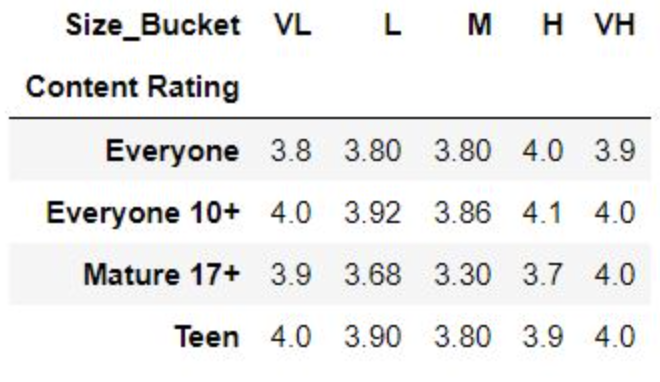

In [317]:
# display heatmappic.png
Image(filename='heatmappic.png')

..which is exactly what you need to create a heatmap!

In [318]:
##Store the pivot table in a separate variable
res = pd.pivot_table(data=inp1, index='Content Rating', columns='Size_Bucket', values='Rating', aggfunc=lambda x: np.quantile(x,0.2))

In [319]:
?sns.heatmap

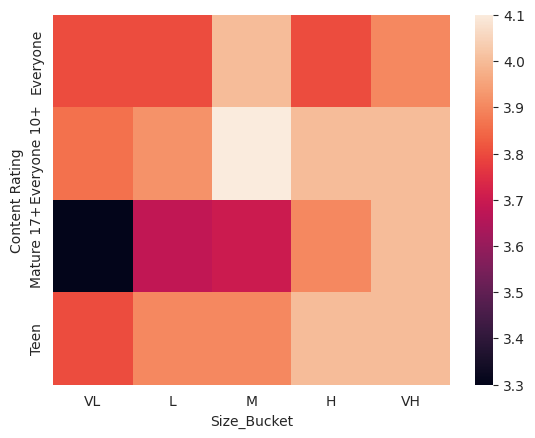

In [320]:
##Plot a heat map
sns.heatmap(res)
plt.show()

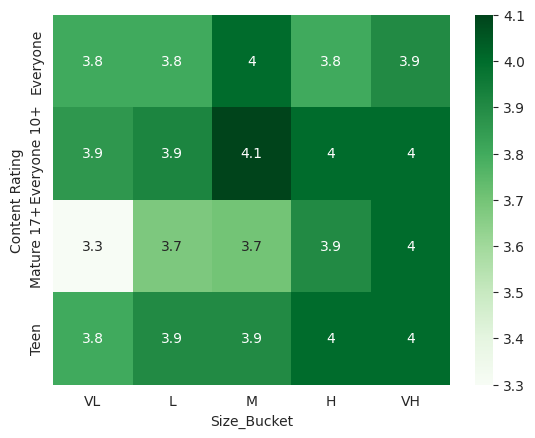

In [321]:
##Apply customisations
sns.heatmap(res, cmap='Greens', annot=True)
plt.show()

Once you’ve created a rectangular grid (either provided or made using the pivot table method taught earlier), use the sns.heatmap() function and pass the grid dataframe as the parameter.Mention some parameters like (cmap = "Greens", annot=True) to enhance its readability.

The final heat map that you obtained looked like this:

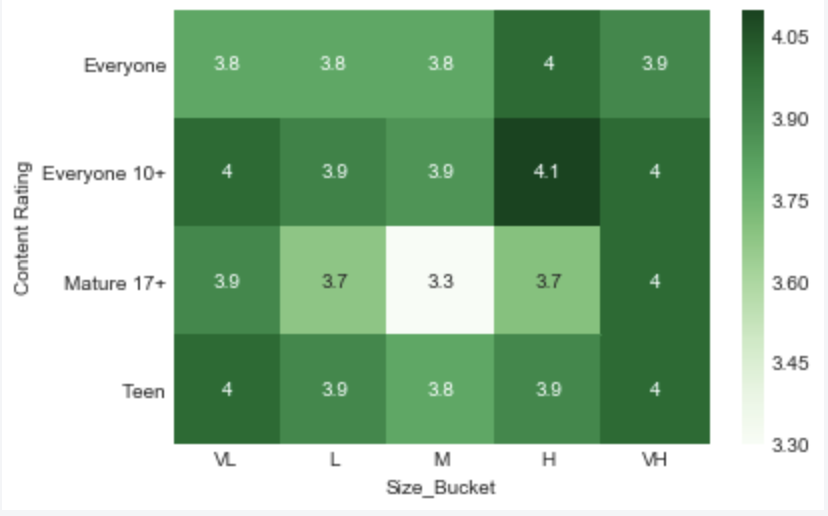

In [322]:
#display image heatmap2_
Image(filename='heatmap2_.png')

Note - There's an additional question in the notebook where instead of Content Rating you'll be analysing Review Buckets using the q.cut approach mentioned above.

In [324]:
##Question - Replace Content Rating with Review_buckets in the above heat map
##Keep the aggregation at minimum value for Rating
# Categorize 'Reviews' into buckets
inp1['Review_buckets'] = pd.qcut(inp1['Reviews'], 5, labels=['Very Low', 'Low', 'Medium', 'High', 'Very High'])

# Create the pivot table with minimum rating
res = pd.pivot_table(data=inp1, index='Review_buckets', columns='Size_Bucket', values='Rating', aggfunc='min')

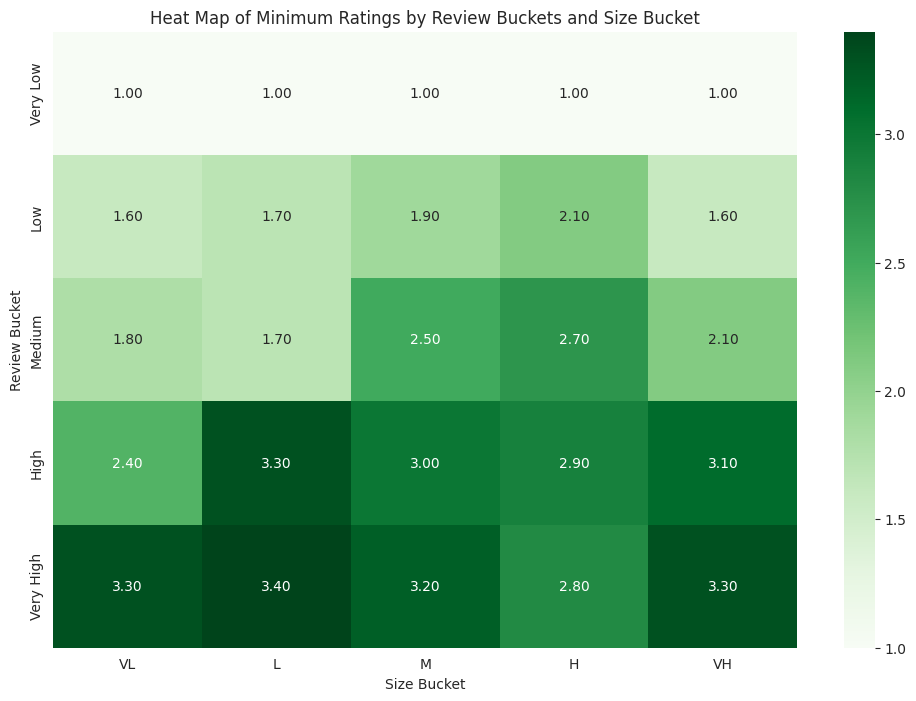

In [326]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot the heat map
plt.figure(figsize=(12, 8))  # Set figure size for better visibility
sns.heatmap(res, annot=True, fmt=".2f", cmap='Greens')  # Use annotations and a suitable color map
plt.title('Heat Map of Minimum Ratings by Review Buckets and Size Bucket')  # Title for clarity
plt.xlabel('Size Bucket')  # Label for x-axis
plt.ylabel('Review Bucket')  # Label for y-axis
plt.show()

Additional Notes:

* Heat maps are predominantly used in machine learning problems to visualise a  Correlation Matrix, a grid that shows the correlation between any two quantitative variables. As mentioned in the additional notes of previous segments, understanding the correlation between variables is crucial for building and evaluating any ML model. You’ll learn more about them in the upcoming modules.

### Session 3: Additional Visualisations

#### Line Plots/Charts

Example worm graph:

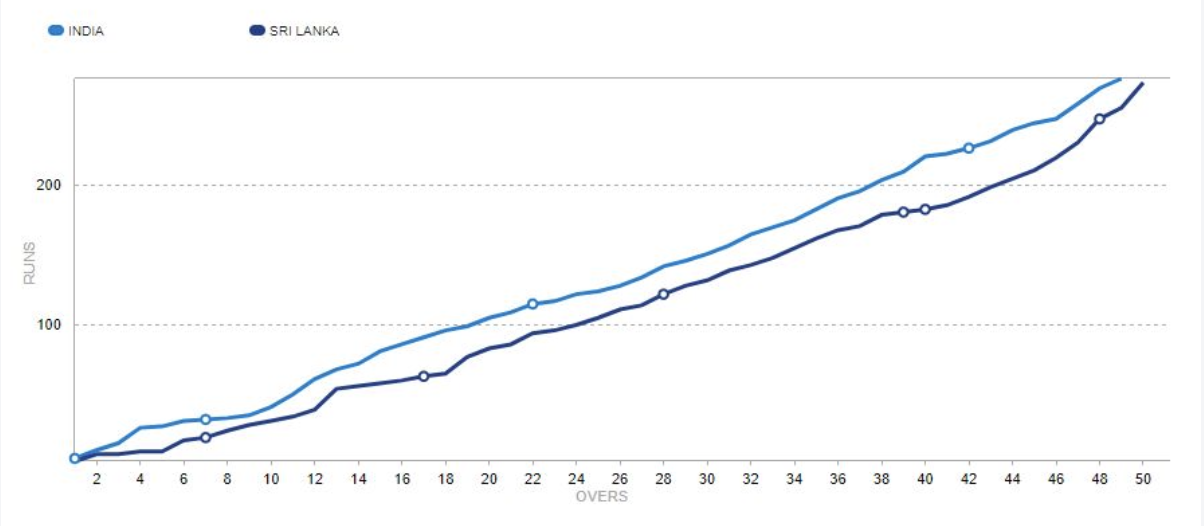

In [327]:
#display wormgraph.png
Image(filename='wormgraph.png')

This graph is an example of a line graph (when drawn at such a scale it resembles a “crawling worm”)

Main feature of line graph:
* it utilises continuous time-dependent data to accurately depict the trend of a variable

- A line plot tries to observe trends using time dependent data.
-  Earlier, you used parse_time parameter to index the date-time fields. For this part, you'll be using **pd.to_datetime()** function. Check out its documentation:https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.to_datetime.html


Analyze the ratings by month

In [328]:
inp1.dtypes

App                 object
Category            object
Rating             float64
Reviews              int32
Size               float64
Installs             int64
Type                object
Price              float64
Content Rating      object
Genres              object
Last Updated        object
Current Ver         object
Android Ver         object
Size_Bucket       category
Review_buckets    category
dtype: object

In [329]:
inp1['Last Updated'].head()

0     January 7, 2018
1    January 15, 2018
2      August 1, 2018
3        June 8, 2018
4       June 20, 2018
Name: Last Updated, dtype: object

In [ ]:
## Extract the month from the Last Updated Date
# change to datetime
inp1['updated_month'] = pd.to_datetime(inp1['Last Updated']).dt.month

In [332]:
## Find the average Rating across all the months
inp1.groupby(['updated_month'])['Rating'].mean()

updated_month
1     4.143842
2     4.090385
3     4.107963
4     4.148326
5     4.153375
6     4.172590
7     4.222968
8     4.271086
9     4.041406
10    4.012739
11    4.102685
12    4.065350
Name: Rating, dtype: float64

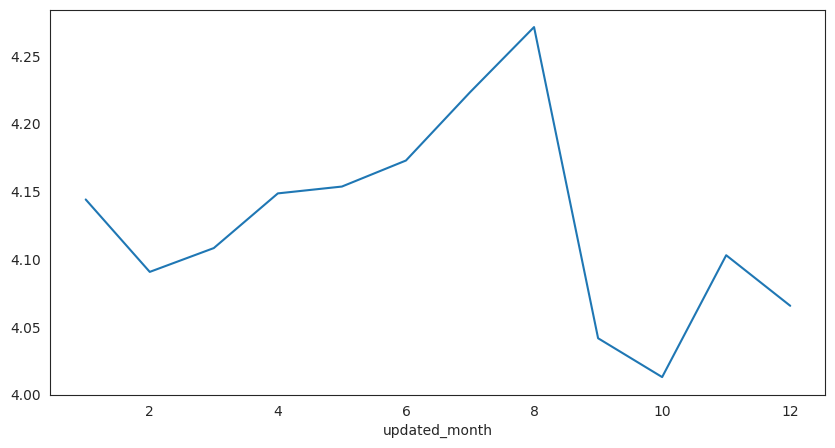

In [333]:
## Plot a line graph
plt.figure(figsize=[10,5])
inp1.groupby(['updated_month'])['Rating'].mean().plot()
plt.show()

There is a patterns - mid year there are the highest ratings

Here are the steps you followed to create the line chart:

* You converted the date column to a date_time object using pd.to_datetime.
* After that, you found the average rating for each month using a groupby.
* Then, you used the plot function of matplotlib to create a line chart.

Though not quite significant, there is indeed some improvement in the ratings during the months of July-August. Note that, here, we have assumed the Last Updated month to be the one in which all the reviews and ratings are coming from the users.

Additional Notes:

* Line charts are more or less utilised only for time-series data. Therefore, you’ll be using them predominantly while working on forecasting and other time series models.

#### Stacked Bar Charts

- A stacked bar chart breaks down each bar of the bar chart on the basis of a different category
- For example, for the Campaign Response bar chart you saw earlier, the stacked bar chart is also showing the Gender bifurcation as well

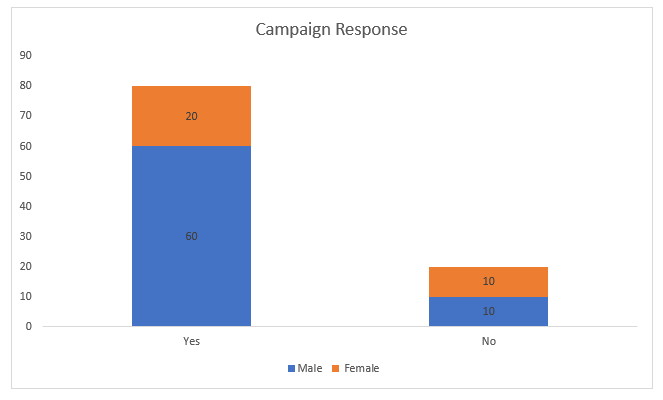

In [307]:
# display image stacked.png
Image(filename='stacked.PNG')

Lets check if there is any difference in the nature of the content rating of the apps or the audience they are targeting.
So we want to get the avg rating and see how it moves for each month for the different buckets. Lets also look at the prevalence of each kind of app across the months. We are trying to see, in the months June July August, are some types of apps being rated more than others?

Create a stacked bar chart by comparing Installs across the different months and different categories of Content Rating.

In [ ]:
# get total installs for each of them

In [334]:
## Create a pivot table for Content Rating and updated Month with the values set to Installs
pd.pivot_table(data=inp1, values='Installs', index='updated_month', columns='Content Rating', aggfunc=sum)

Content Rating    Everyone  Everyone 10+  Mature 17+        Teen
updated_month                                                   
1                925387390     105282000     9701210    44159010
2                545372005      19821000    13021500    39597710
3                695365520      30322510     9111100    79850310
4                973371180      23300000     5259000   161619410
5               1861067800     118173500    50140100   202689600
6               2427170505     317727100   145257200   415716600
7               7771109680     456556000   419491910  1943556800
8               5930943320     215821000   312981700  1257855650
9                260340410      24931100     2201010    22483100
10               258279680      23101000     3160000    45629210
11               625424710      60310000     1070100    31261100
12               567105770       8410000    12960100    51707100

In [335]:
##Store the table in a separate variable
monthly = pd.pivot_table(data=inp1, values='Installs', index='updated_month', columns='Content Rating', aggfunc=sum)

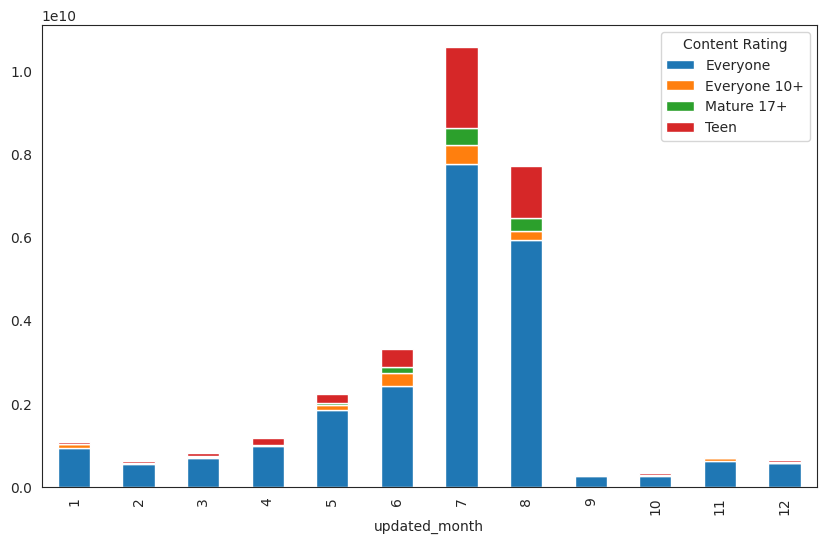

In [336]:
##Plot the stacked bar chart.
monthly.plot(kind='bar', stacked="True", figsize=[10,6])
plt.show()

Get proportions/perc instead of absolute values

In [339]:
##Plot the stacked bar chart again wrt to the proportions.
monthly_perc = monthly[['Everyone', 'Everyone 10+', 'Mature 17+', 'Teen']].apply(lambda x: x/x.sum(), axis=1)

# This line of code normalizes each row in the specified columns of the 'monthly' DataFrame.
# The lambda function takes each row (x), and divides every element by the row's total sum.
# This results in each element representing its proportion of the total row sum, effectively converting absolute values to relative percentages.

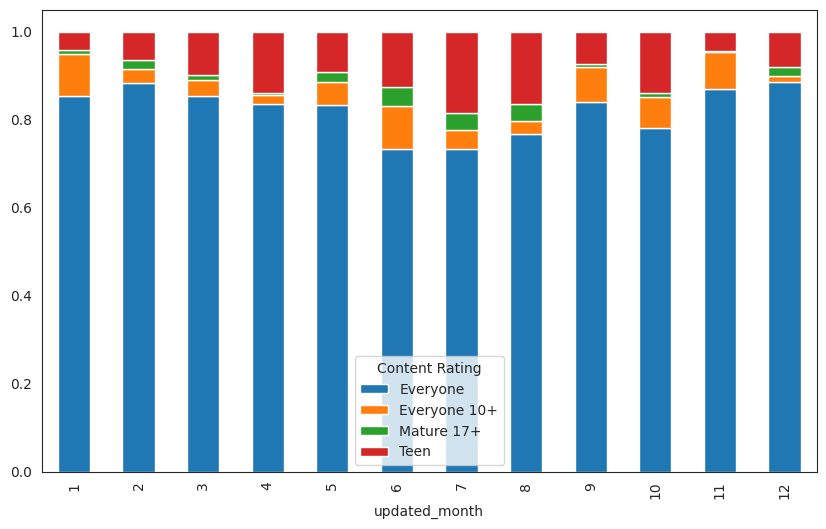

In [340]:
# plot monthly_perc
monthly_perc.plot(kind='bar', stacked="True", figsize=[10,6])
plt.show()

To create a stacked bar chart, you need to follow these steps:

* First, create a pivot table with the updated month and Content Rating as the rows and columns and the “values” parameter set to the number of Installs.
* Now, plot a stacked bar chart by using the plot() function from matplotlib. Also, set the stacked parameter as True. See second last chart

Here, even though you can say that the months June-Aug has the highest number of installs, it is quite difficult to infer anything about the different Content Rating categories. To overcome this, you set all of the different types( Content Rating)of installs in proportion to their monthly installs (last chart)

#### Plotly

Plotly is a Python library used for creating interactive visual charts. You can take a look at how you can use it to create aesthetic looking plots with a lot of user-friendly functionalities like hover, zoom, etc.

Check out this link for installation and documentation:https://plot.ly/python/getting-started/

In [ ]:
#Install plotly


In [ ]:
#Take the table you want to plot in a separate variable


In [ ]:
#Import the plotly libraries


In [ ]:
#Prepare the plot
